# **Facial Emotion Detection**

## **Problem Definition**

### _**The context:** Why is this problem important to solve?_
#### As technology becomes more integrated into daily life, enhancing human-computer interaction is essential. Facial emotion detection allows computers to understand and respond to human emotions, making interactions more natural and intuitive. It can also helps solving problems unaffected by mood or getting tired, which is important at safety critical tasks. Some examples of applications are:
- Mental Health Monitoring by detecting changes in emotional states over time, it could provide early warnings of mental health issues such as depression or anxiety, enabling timely intervention.
- Enhanced User Experience in Various sectors like retail, entertainment, and marketing, understanding customer emotions that may enhance user experience.
- Automotive Safety where emotion detection can monitor the driver’s state, detecting signs of fatigue or stress, and potentially preventing accidents.
- Security Systems where facial emotion detection can be used to detect suspicious behavior or stress, which could be indicative of criminal intentions or distress situations.
- Healthcare and Patient Care by understanding patient emotions, which can improve care quality.
- Robotics and AI where, emotional intelligence is key for creating more sophisticated, empathetic, and interactive robots.

### _**The objectives:** What is the intended goal?_
#### After an initial assessment involving a visual validation on the image dataset to be used as training, validation and testing input for the Machine Learning models, a comparison will be made between various pre-trained models and custom models, with the goal of identifying which model performs best for this particular task of Object Classification of Facial Emotions.

### _**The key questions:** What are the key questions that need to be answered?_
#### Some of the key questions to be answered are:
- **Data Quality and Consistency:** Is the dataset suitable or have any inconsistencies that could affect the training and evaluation of models?
- **Model Suitability:** Which pre-trained models are most suitable for this task, and how do they compare to custom models developed specifically for facial emotion recognition?
- **Performance Metrics:** Beyond accuracy, what other metrics (like precision, recall, F1 score) are important for evaluating the performance of these models in this context?
- **Generalization Ability:** How well do these models generalize to unseen data, are there any signs of overfitting?
- **Computational Efficiency:** What are the trade-offs between model accuracy and computational resources required, such as training time?

### _**The problem formulation:** What are we trying to solve using data science?_
#### By utilising Machine Learning and AI we can accelerate and process data in a more deterministic and much faster rate than humans might, or with significantly less resources. Some of the other issues that we are trying to solve are:
- **Optimizing Human-Computer Interaction:** By integrating facial emotion detection into computer systems, we aim to create more responsive and intuitive interactions, making technology more attuned to human needs and emotional states.

- **Enhancing Safety and Security:** Through the detection of emotional cues, such as stress or fatigue, particularly in critical sectors like automotive and security systems, we aim to proactively address safety concerns and potentially prevent accidents or security breaches.

- **Improving Healthcare and Mental Health Monitoring:** By identifying emotional changes over time, we can offer better insights into mental health and patient care. This could lead to early detection of conditions like depression or anxiety, and improve the overall quality of care in healthcare settings.

- **Advancing Retail, Entertainment, and Marketing:** Understanding customer emotions in real-time can revolutionize these sectors by providing enhanced user experiences, personalized content, and improved customer service.

- **Developing Emotional Intelligence in Robotics and AI:** The goal is to endow robots and AI systems with the ability to recognize and respond to human emotions, paving the way for more empathetic and sophisticated interactions between humans and machines.

#### With Data Science, especifically Machine Learning and AI we can not only accurately interpret facial emotions but also apply this understanding in various real-world applications to improve safety, healthcare, user experience, and human-computer interactions, amongst many other applications.

## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential

import zipfile

#Checking Tensorflow version
print(tf.__version__)

2.15.0


### **Let us load and unzip the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [4]:
# Loading dataset to variable 'path'
path = '/content/drive/MyDrive/Useful Docs/Facial_emotion_images.zip'

# Extracting dataset from zipfile
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [2]:
# Loading dataset to variable 'path' if working locally
path = '/Users/ceb/Downloads/TEMP/Facial_emotion_images'

In [3]:
import os

folder_path = "Facial_emotion_images/"
emotions_data = {}

for root, dirs, files in os.walk(folder_path):
    for dir_name in dirs:
        # Split the root to get the main folder and subfolder names
        parts = root.split(os.sep)
        if len(parts) > 1:
            main_folder = parts[-1]
            sub_folder = dir_name

            # Initialize nested dictionary if not already present
            if main_folder not in emotions_data:
                emotions_data[main_folder] = {}

            # Initialize the sub-folder dictionary
            dir_path = os.path.join(root, dir_name)
            emotions_data[main_folder][sub_folder] = {'path': dir_path, 'count': 0}

In [4]:
from PIL import Image
import os

folder_path = "Facial_emotion_images/"
emotions_data = {}

# Initialize Nested Emotion Data Dictionary
for root, dirs, files in os.walk(folder_path):
    for dir_name in dirs:
        parts = root.split(os.sep)
        if len(parts) > 1:
            main_folder = parts[-1]
            sub_folder = dir_name

            if main_folder not in emotions_data:
                emotions_data[main_folder] = {}

            dir_path = os.path.join(root, dir_name)
            emotions_data[main_folder][sub_folder] = {'path': dir_path, 'count': 0, 'size': None}

# Count Files and Determine Size
for main_folder in emotions_data:
    for sub_folder in emotions_data[main_folder]:
        dir_path = emotions_data[main_folder][sub_folder]['path']
        file_count = 0

        if os.path.isdir(dir_path):
            for file in os.listdir(dir_path):
                if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    if file_count == 0:  # Check size for the first image
                        with Image.open(os.path.join(dir_path, file)) as img:
                            emotions_data[main_folder][sub_folder]['size'] = img.size
                    file_count += 1

        emotions_data[main_folder][sub_folder]['count'] = file_count

        # Print the updated information
        print(f"Folder: {main_folder}, Emotion: {sub_folder}, Count: {emotions_data[main_folder][sub_folder]['count']}, Size: {emotions_data[main_folder][sub_folder]['size']}, Path: {dir_path}")

Folder: , Emotion: test, Count: 0, Size: None, Path: Facial_emotion_images/test
Folder: , Emotion: train, Count: 0, Size: None, Path: Facial_emotion_images/train
Folder: , Emotion: validation, Count: 0, Size: None, Path: Facial_emotion_images/validation
Folder: test, Emotion: happy, Count: 32, Size: (48, 48), Path: Facial_emotion_images/test/happy
Folder: test, Emotion: sad, Count: 32, Size: (48, 48), Path: Facial_emotion_images/test/sad
Folder: test, Emotion: surprise, Count: 32, Size: (48, 48), Path: Facial_emotion_images/test/surprise
Folder: test, Emotion: neutral, Count: 32, Size: (48, 48), Path: Facial_emotion_images/test/neutral
Folder: train, Emotion: happy, Count: 3976, Size: (48, 48), Path: Facial_emotion_images/train/happy
Folder: train, Emotion: sad, Count: 3982, Size: (48, 48), Path: Facial_emotion_images/train/sad
Folder: train, Emotion: surprise, Count: 3173, Size: (48, 48), Path: Facial_emotion_images/train/surprise
Folder: train, Emotion: neutral, Count: 3978, Size: (4

In [5]:
# Confirming whether the structure works, it can be reused later in the code
print(emotions_data['train']['sad']['path'])
print(emotions_data['train']['sad']['size'])
print(emotions_data['train']['sad']['count'])

Facial_emotion_images/train/sad
(48, 48)
3982


In [6]:
# Store image size to be reused since all images are 48x48 pixels
img_size = emotions_data['train']['sad']['size']

## **Visualizing our Classes**

### **Happy**

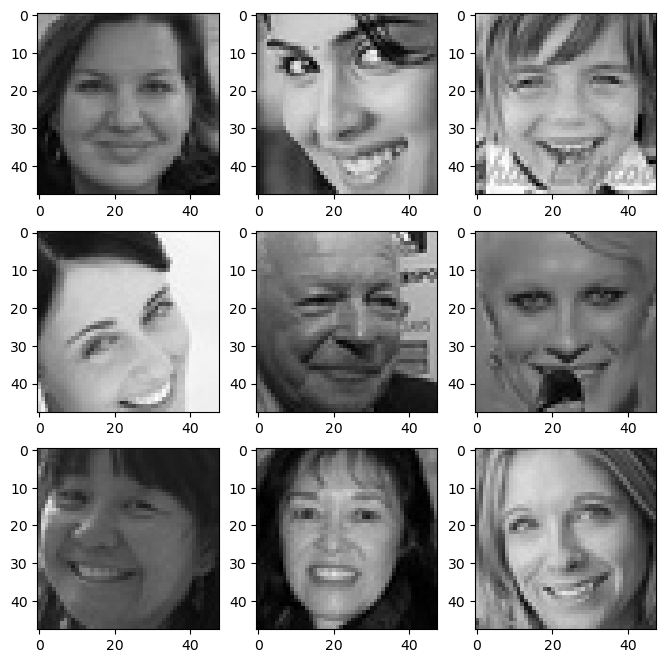

In [8]:
# Reusing variables from earlier data exploration
emotion = 'happy'
path = emotions_data['train'][emotion]['path']

# Plotting images for visualisation
plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
  plt.subplot(3, 3, i)
  img = load_img(path + "/" +
                os.listdir(path)[i], target_size = (img_size))
  plt.imshow(img)
plt.show()

**Observations and Insights:The 'happy' images predominantly feature smiles, with the corners of the mouth turned upwards and eyes often crinkling. A key distinguishing feature is the genuine warmth in the eyes, setting it apart from neutral or sad expressions. However, some challenging images include subtle smiles, which could be confused with a neutral expression, especially in lower-resolution or unclear images. Some images are also partially ocluded which could be a challenge for the Neural Network.**

### **Sad**

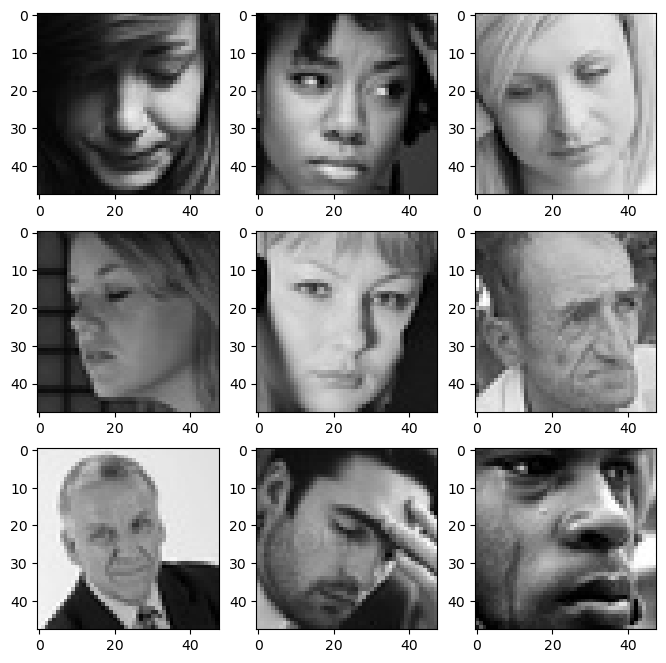

In [9]:
# Reusing variables from earlier data exploration
emotion = 'sad'
path = emotions_data['train'][emotion]['path']

# Plotting images for visualisation
plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
  plt.subplot(3, 3, i)
  img = load_img(path + "/" +
                os.listdir(path)[i], target_size = (img_size))
  plt.imshow(img)
plt.show()

**Observations and Insights: Sad expressions are characterized by downturned mouths, furrowed brows, and sometimes teary eyes. A unique aspect is the overall downward trajectory of facial features. Challenges arise in distinguishing subtle sad expressions from neutral ones, as some individuals may exhibit less pronounced sadness cues.**

### **Neutral**

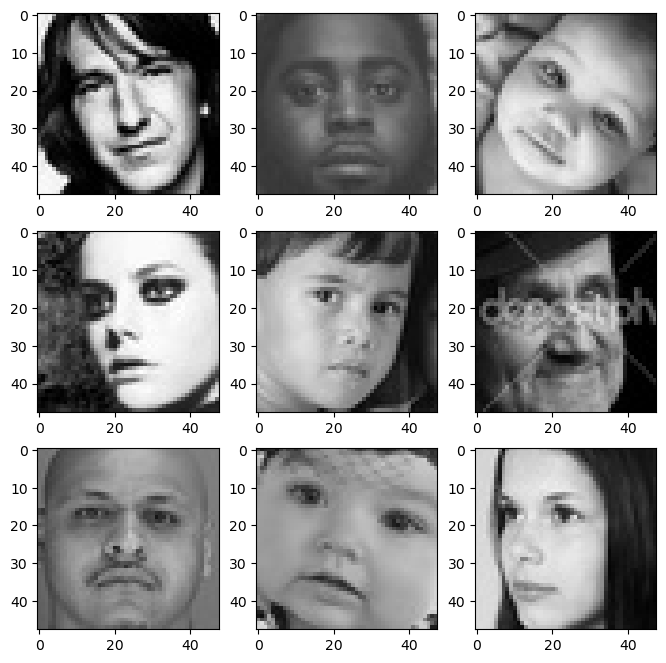

In [10]:
# Reusing variables from earlier data exploration
emotion = 'neutral'
path = emotions_data['train'][emotion]['path']

# Plotting images for visualisation
plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
  plt.subplot(3, 3, i)
  img = load_img(path + "/" +
                os.listdir(path)[i], target_size = (img_size))
  plt.imshow(img)
plt.show()

**Observations and Insights: Neutral expressions are marked by a lack of significant emotional indicators. The mouth is typically relaxed and straight, and the eyes are open without notable crinkling or squinting. The challenge in this category is differentiating between subtle emotional expressions and truly neutral ones, as minimal cues can sometimes be misinterpreted.**

### **Surprised**

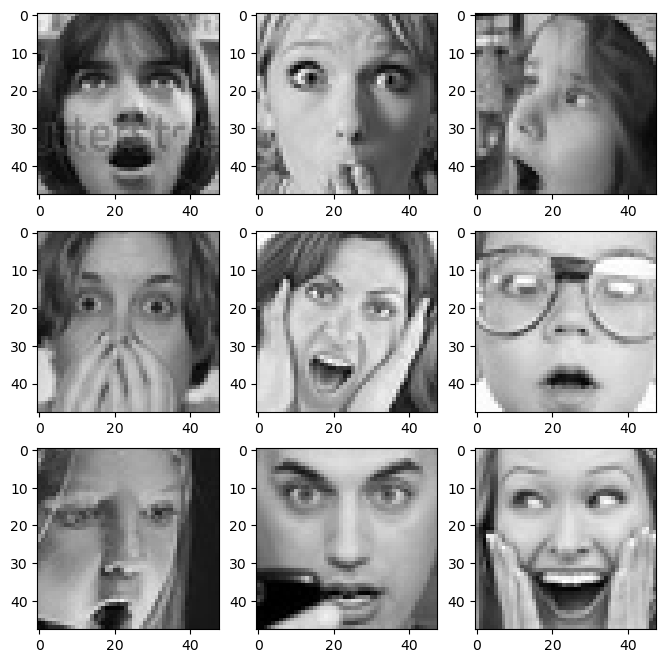

In [11]:
# Reusing variables from earlier data exploration
emotion = 'surprise'
path = emotions_data['train'][emotion]['path']

# Plotting images for visualisation
plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
  plt.subplot(3, 3, i)
  img = load_img(path + "/" +
                os.listdir(path)[i], target_size = (img_size))
  plt.imshow(img)
plt.show()

**Observations and Insights: Surprised expressions are easily identifiable by wide-open eyes and often an open mouth. The uniqueness lies in the sense of suddenness and exaggeration in the features. The difficulty is in differentiating between positive surprise and other high-arousal emotions, like happy, in some images where context and lesser cues are present.**

## **Checking Distribution of Classes**

In [145]:
# 'category' will be 'train', 'test' and 'validation'
for category in emotions_data:
  for emotion in emotions_data[category]:
    if emotions_data[category][emotion]['count'] != 0:
      print("The {} dataset has {} {} images.".format(category, emotions_data[category][emotion]['count'], emotion))

The test dataset has 32 happy images.
The test dataset has 32 sad images.
The test dataset has 32 surprise images.
The test dataset has 32 neutral images.
The train dataset has 3976 happy images.
The train dataset has 3982 sad images.
The train dataset has 3173 surprise images.
The train dataset has 3978 neutral images.
The validation dataset has 1825 happy images.
The validation dataset has 1139 sad images.
The validation dataset has 797 surprise images.
The validation dataset has 1216 neutral images.


In [9]:
# Calculating the ratio between largest dataset and smallest. Other datasets sizes are similar to 'sad' dataset
surprise_ratio = emotions_data['train']['surprise']['count']/emotions_data['train']['sad']['count']
print("The 'surprise' dataset is {:.1f}% smaller than 'sad' dataset".format((1-surprise_ratio)*100))

The 'surprise' dataset is 20.3% smaller than 'sad' dataset


# **Further Data Exploration**

### **Visualising Validation Dataset for any obvious issues on the images**

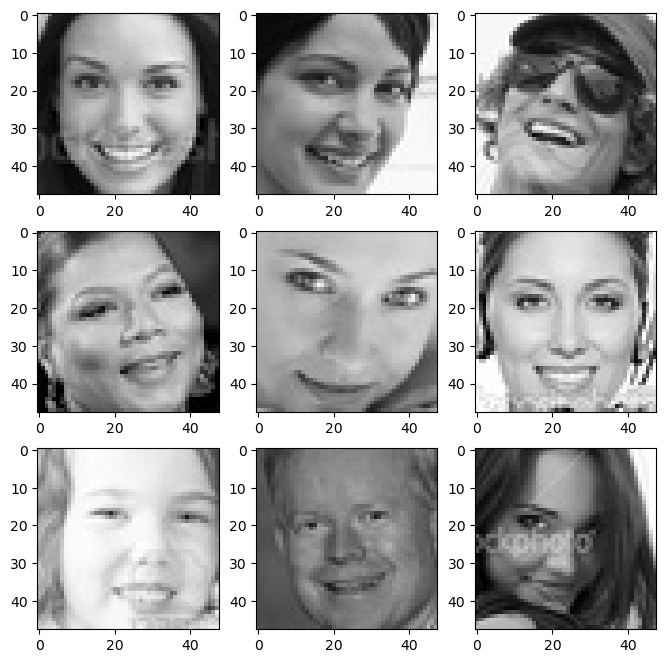

In [125]:
# Visualising the validation and test datasets
emotion = 'happy'
path = emotions_data['validation'][emotion]['path']

# Plotting images for visualisation
plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
  plt.subplot(3, 3, i)
  img = load_img(path + "/" +
                os.listdir(path)[i], target_size = (img_size))
  plt.imshow(img)
plt.show()

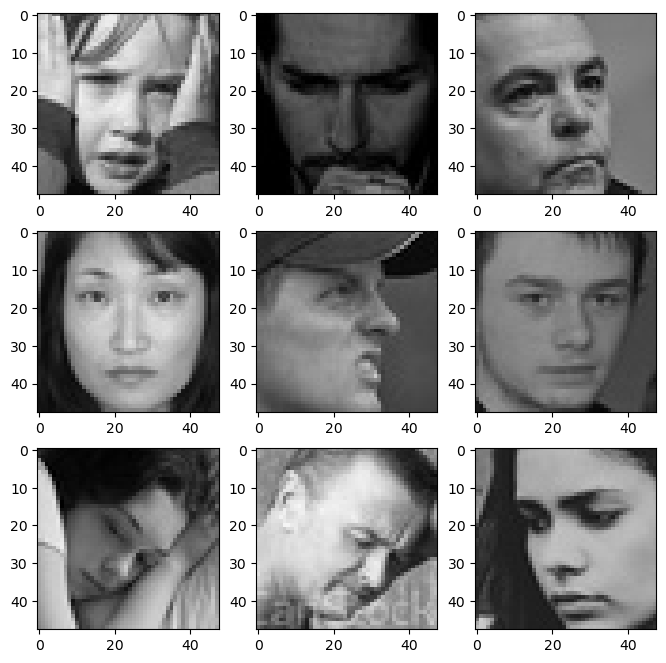

In [126]:
# Visualising the validation and test datasets
emotion = 'sad'
path = emotions_data['validation'][emotion]['path']

# Plotting images for visualisation
plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
  plt.subplot(3, 3, i)
  img = load_img(path + "/" +
                os.listdir(path)[i], target_size = (img_size))
  plt.imshow(img)
plt.show()

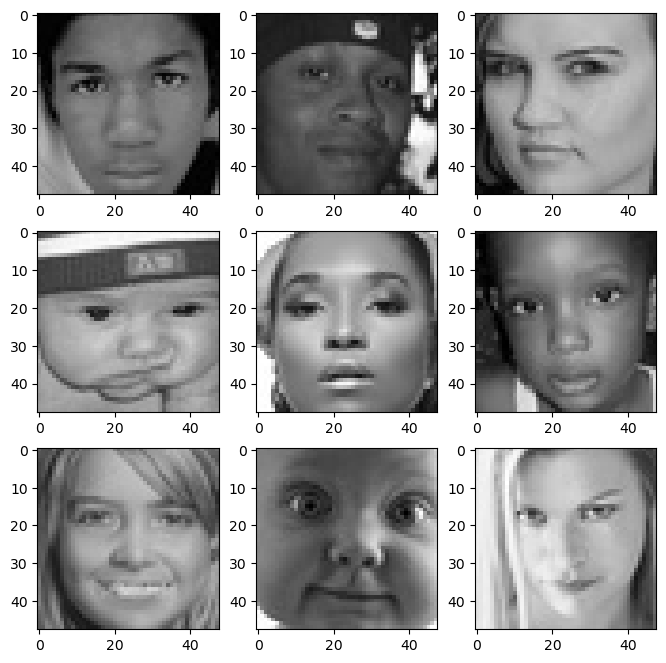

In [127]:
# Visualising the validation and test datasets
emotion = 'neutral'
path = emotions_data['validation'][emotion]['path']

# Plotting images for visualisation
plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
  plt.subplot(3, 3, i)
  img = load_img(path + "/" +
                os.listdir(path)[i], target_size = (img_size))
  plt.imshow(img)
plt.show()

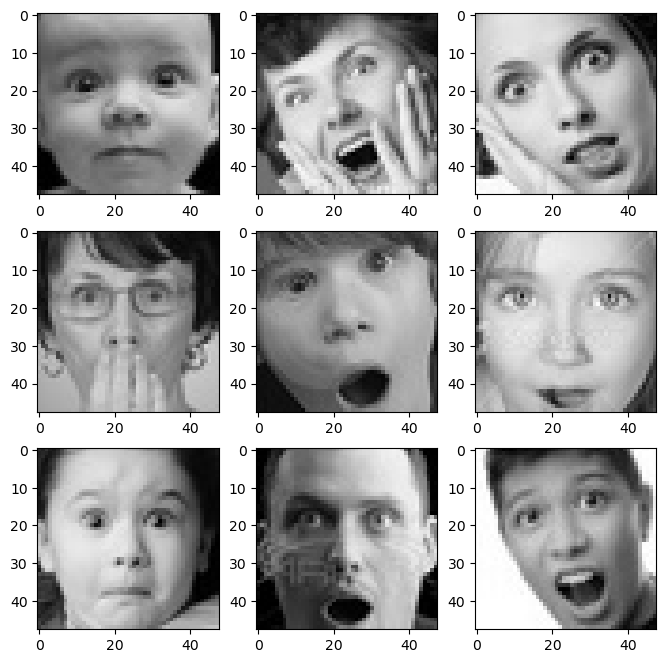

In [128]:
# Visualising the validation and test datasets
emotion = 'surprise'
path = emotions_data['validation'][emotion]['path']

# Plotting images for visualisation
plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
  plt.subplot(3, 3, i)
  img = load_img(path + "/" +
                os.listdir(path)[i], target_size = (img_size))
  plt.imshow(img)
plt.show()

### **Visualising Test Dataset for any obvious issues on the images**

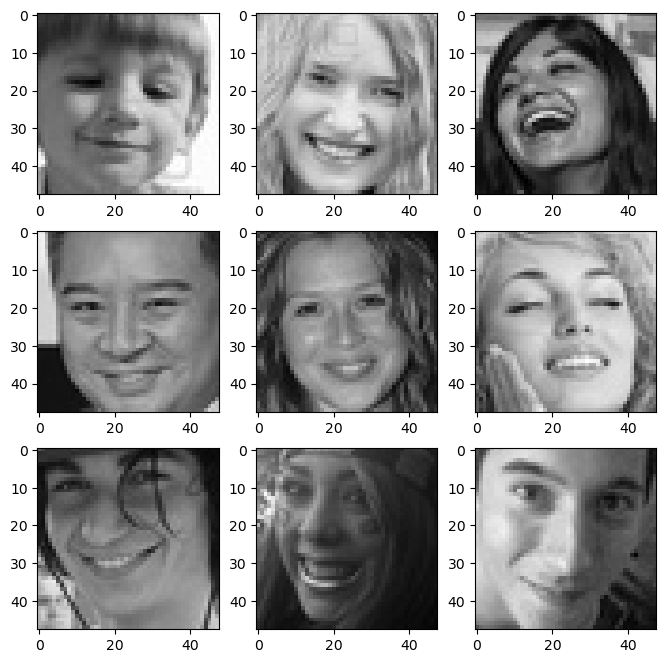

In [133]:
# Visualising the validation and test datasets
emotion = 'happy'
path = emotions_data['test'][emotion]['path']

# Plotting images for visualisation
plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
  plt.subplot(3, 3, i)
  img = load_img(path + "/" +
                os.listdir(path)[i], target_size = (img_size))
  plt.imshow(img)
plt.show()

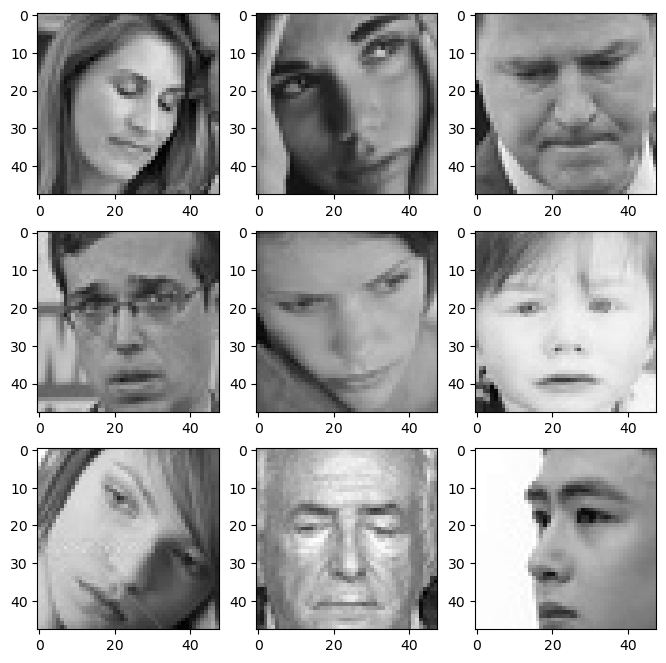

In [130]:
# Visualising the validation and test datasets
emotion = 'sad'
path = emotions_data['test'][emotion]['path']

# Plotting images for visualisation
plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
  plt.subplot(3, 3, i)
  img = load_img(path + "/" +
                os.listdir(path)[i], target_size = (img_size))
  plt.imshow(img)
plt.show()

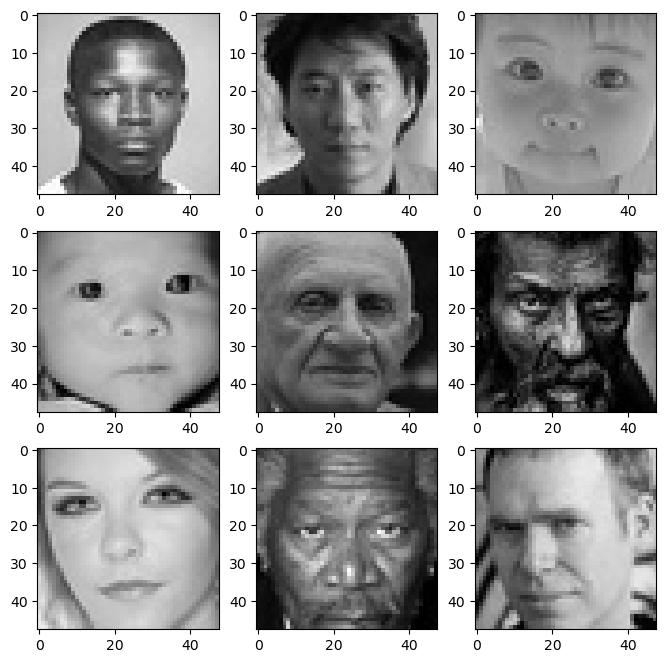

In [131]:
# Visualising the validation and test datasets
emotion = 'neutral'
path = emotions_data['test'][emotion]['path']

# Plotting images for visualisation
plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
  plt.subplot(3, 3, i)
  img = load_img(path + "/" +
                os.listdir(path)[i], target_size = (img_size))
  plt.imshow(img)
plt.show()

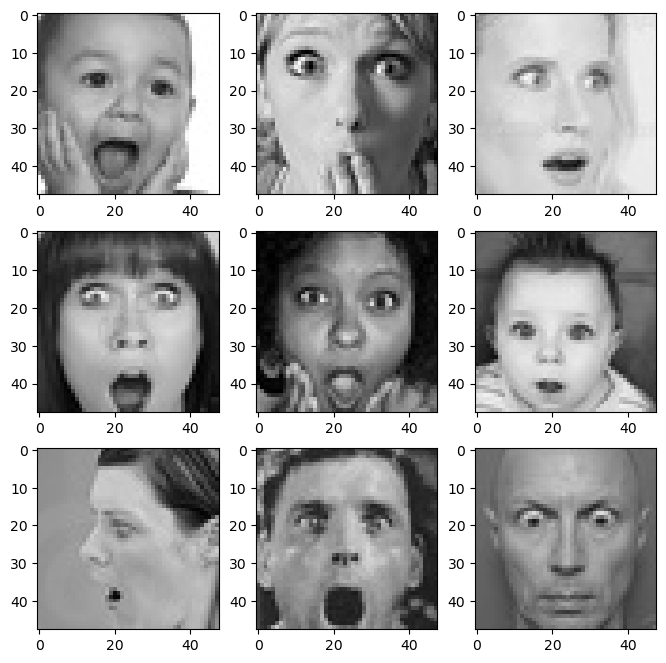

In [132]:
# Visualising the validation and test datasets
emotion = 'surprise'
path = emotions_data['test'][emotion]['path']

# Plotting images for visualisation
plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
  plt.subplot(3, 3, i)
  img = load_img(path + "/" +
                os.listdir(path)[i], target_size = (img_size))
  plt.imshow(img)
plt.show()

In [10]:
# Checking image sizes
print("Happy images have the size of", emotions_data['train']['happy']['size'])
print("Happy images have the size of", emotions_data['train']['sad']['size'])
print("Happy images have the size of", emotions_data['train']['neutral']['size'])
print("Happy images have the size of", emotions_data['train']['surprise']['size'])

Happy images have the size of (48, 48)
Happy images have the size of (48, 48)
Happy images have the size of (48, 48)
Happy images have the size of (48, 48)


**Further Data Exploration has revealed:**

- **Images are 48x48 pixels in size**
- **Test dataset has exactly 32 images for each emotion**
- **Validation dataset has a significant imbalance with many more happy images and a significantly lower amount of surprise images. This over/under representation will most likely affect the result of the training.**
- **Some images contain watermarks (e.g. Shutterstock)**

**Observations and Insights: The noted imbalance in the 'surprise' dataset, being significantly smaller than the 'sad' dataset (20.3% smaller), indicates a skew in the data. The test dataset containing 32 happy images also suggests potential imbalances. While some degree of class imbalance is common in real-world datasets, the extent of this discrepancy might pose challenges.**

- **Class Distribution: The classes are not equally distributed. The 20.3% smaller 'surprise' dataset compared to 'sad' suggests a notable imbalance. Such disparities can impact the model's performance, potentially leading it to be less accurate in identifying less-represented emotions.**

- **Impact of Imbalance: This imbalance could be problematic as it may cause the neural network to be biased towards recognizing emotions that are more frequently represented in the training data. It may underperform in identifying 'surprise' due to the lack of representation in the data.**

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

In [7]:
# Batch size to be used for training
batch_size  = 32

# Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(horizontal_flip = True,
          brightness_range=(0.,2.),
          rescale=1./255,
          shear_range=0.3)

# Creating dataloader for train for RGB dataset
train_set_rgb = datagen.flow_from_directory(folder_path + "train",
                                        target_size = (img_size),
                                        color_mode = 'rgb',
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        shuffle = True)
# Creating dataloader for train for Grayscale dataset
train_set_gray = datagen.flow_from_directory(folder_path + "train",
                                        target_size = (img_size),
                                        color_mode = 'grayscale',
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        shuffle = True)

# Creating dataloader for validation for RGB dataset
validation_set_rgb = datagen.flow_from_directory(folder_path + "validation",
                                        target_size = (img_size),
                                        color_mode = 'rgb',
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        shuffle = True)
# Creating dataloader for validation for Grayscale dataset
validation_set_gray = datagen.flow_from_directory(folder_path + "validation",
                                        target_size = (img_size),
                                        color_mode = 'grayscale',
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        shuffle = True)

# Creating dataloader for test for RGB dataset
test_set_rgb = datagen.flow_from_directory(folder_path + "test",
                                        target_size = (img_size),
                                        color_mode = 'rgb',
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        shuffle = True)
# Creating dataloader for test for Grayscale dataset
test_set_gray = datagen.flow_from_directory(folder_path + "test",
                                        target_size = (img_size),
                                        color_mode = 'grayscale',
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        shuffle = True)

Found 15109 images belonging to 4 classes.
Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Model Building**

In [8]:
# Fixing the seed for random number generators
fixed_seed = 42

#Creating a function as we'll be resetting the seed multiple times throughout the notebook
def reset_seed(seed):
  np.random.seed(seed)
  import random
  random.seed(seed)
  tf.random.set_seed(seed)
  print("Random number generators seed has been set to", seed)

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, LeakyReLU
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import legacy  
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend

# Clearing backend
backend.clear_session()

# Reset seed for number generators using reset_seed() function
reset_seed(fixed_seed)

Random number generators seed has been set to 42


### **Creating the Base Neural Network**

In [10]:
# Defining Base NN
def cnn_model_1(colour_layers):
    cnn_model = Sequential()

    # First Convolutional layer with 64 filters and the kernel size of 3x3, 'same' padding and input shape = (48, 48, 3 - RGB colours)
    cnn_model.add(Conv2D(filters = 64, kernel_size = (2, 2), padding = "same", input_shape = (img_size[0], img_size[1], colour_layers), activation = 'relu'))
    # A max-pooling layer with a pool size of 2x2
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    # Dropout layer with the rate equal to 0.2
    cnn_model.add(Dropout(0.2))
    # Second Convolutional layer with 32 filters and the kernel size of 2x2 with 'same' padding
    cnn_model.add(Conv2D(filters = 32, kernel_size = (2, 2), padding = "same", activation = 'relu'))
    # A max-pooling layer with a pool size of 2x2
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    # Dropout layer with the rate equal to 0.2
    cnn_model.add(Dropout(0.2))
    # Third Convolutional layer with 32 filters and the kernel size of 2x2 with 'same' padding
    cnn_model.add(Conv2D(filters = 32, kernel_size = (2, 2), padding = "same", activation = 'relu'))
    # A max-pooling layer with a pool size of 2x2
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    # Dropout layer with the rate equal to 0.2
    cnn_model.add(Dropout(0.2))
    # Flatten the output from the previous layer
    cnn_model.add(Flatten())
    # Dense layer with 512 nodes
    cnn_model.add(Dense(512, activation = 'relu'))
    # Dropout layer with the rate equal to 0.4
    cnn_model.add(Dropout(0.4))
    # Final output layer with nodes equal to the number of classes (sad, happy, neutral and surprised) and 'softmax' as the activation function
    cnn_model.add(Dense(4, activation = 'softmax'))
    # Compiling the CNN model with categorical crossentropy as loss function, Adam Optimizer
    # with 0.001 learning rate, and set metrics set to 'accuracy'.
    cnn_model.compile(loss='categorical_crossentropy',
              optimizer=legacy.Adam(learning_rate = 0.001),
              metrics=['accuracy'])
    return cnn_model

### **Compiling and Training the Model**

In [11]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# ModelCheckpoint is used to save the model at certain intervals
checkpoint = ModelCheckpoint("model1.h5",     # file path where the model will be saved
                             monitor='val_accuracy', # means the callback monitors the validation accuracy
                             verbose=1,         # model is saved only when the metric (val_acc) has improved
                             save_best_only=True,
                             mode='max')

# Stop the training process early if a monitored metric has stopped improving
early_stopping = EarlyStopping(monitor = 'val_loss',  # monitors the validation loss
                          min_delta = 0,              # any positive change is considered as an improvement
                          patience = 3,               # training will be stopped if no improvement is seen for 3 epochs
                          verbose = 1,
                          restore_best_weights = True # weights are reverted to best value after early stopping
                          )

# Reduces the learning rate when a metric has stopped improving
reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss', # monitor the validation loss
                              factor = 0.2,                   # learning rate reduced to 20% when reduction is triggered
                              patience = 3,                   # reduction happens after 3 epochs with no improvement
                              verbose = 1,
                              min_delta = 0.0001)

# Configured callbacks will be passed to the model during training
callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

# Number of iterations over the entire dataset that the training process should run
epochs = 20

In [16]:
# Building the model
model1 = cnn_model_1(3)
# Print first model's summary
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0

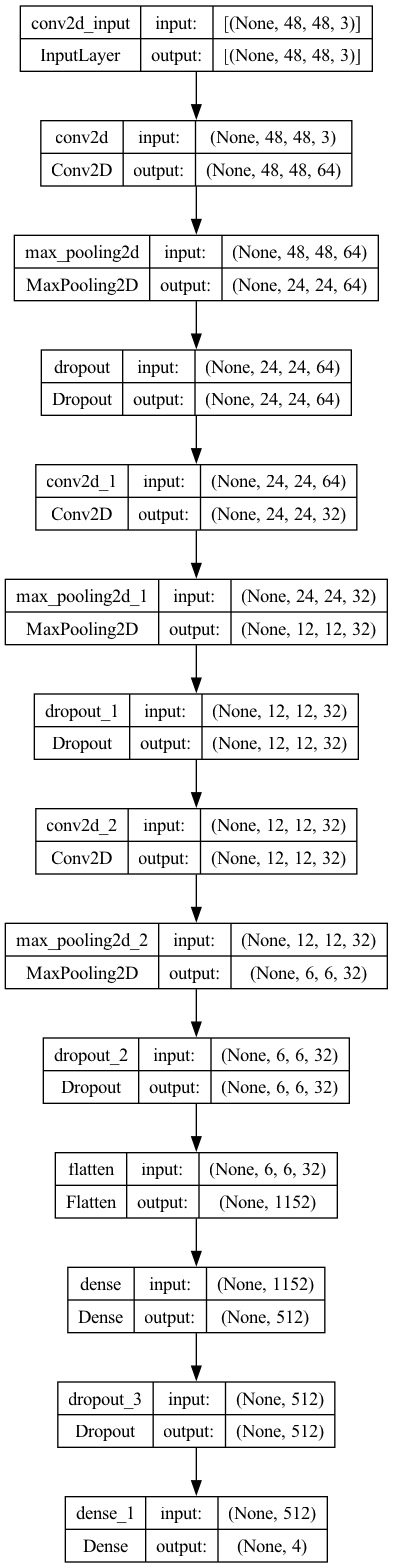

In [18]:
# Visualize the model as blocks
from tensorflow.keras.utils import plot_model
plot_model(model1, to_file='model.png', show_shapes=True, show_layer_names=True)

In [20]:
# Fitting the model with required parameters above, saving model into history variable
history = model1.fit(
    train_set_rgb,
    steps_per_epoch = train_set_rgb.samples // train_set_rgb.batch_size,
    validation_data = validation_set_rgb,
    validation_steps = validation_set_rgb.samples // validation_set_rgb.batch_size,
    epochs = 20,
    verbose = 1,
    callbacks = callbacks_list
)

Epoch 1/20
472/472 [==============================] - ETA: 0s - loss: 1.3347 - accuracy: 0.3343
Epoch 1: val_accuracy improved from -inf to 0.46310, saving model to model1.h5
472/472 [==============================] - 15s 32ms/step - loss: 1.3347 - accuracy: 0.3343 - val_loss: 1.2183 - val_accuracy: 0.4631 - lr: 0.0010
Epoch 2/20
  5/472 [..............................] - ETA: 11s - loss: 1.1861 - accuracy: 0.5312

/Users/ceb/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


472/472 [==============================] - ETA: 0s - loss: 1.1885 - accuracy: 0.4742
Epoch 2: val_accuracy improved from 0.46310 to 0.49859, saving model to model1.h5
472/472 [==============================] - 15s 31ms/step - loss: 1.1885 - accuracy: 0.4742 - val_loss: 1.1562 - val_accuracy: 0.4986 - lr: 0.0010
Epoch 3/20
472/472 [==============================] - ETA: 0s - loss: 1.1079 - accuracy: 0.5114
Epoch 3: val_accuracy improved from 0.49859 to 0.57802, saving model to model1.h5
472/472 [==============================] - 15s 32ms/step - loss: 1.1079 - accuracy: 0.5114 - val_loss: 1.0088 - val_accuracy: 0.5780 - lr: 0.0010
Epoch 4/20
471/472 [============================>.] - ETA: 0s - loss: 1.0537 - accuracy: 0.5370
Epoch 4: val_accuracy did not improve from 0.57802
472/472 [==============================] - 16s 33ms/step - loss: 1.0536 - accuracy: 0.5370 - val_loss: 0.9875 - val_accuracy: 0.5712 - lr: 0.0010
Epoch 5/20
471/472 [============================>.] - ETA: 0s - loss: 

### **Evaluating the Model on the Test Set**

In [20]:
from keras.models import load_model

# Load the saved model if notebook session gets disconnected
model1 = load_model("model1.h5")

In [21]:
# Evaluate the model on the test data using
test_loss, test_accuracy = model1.evaluate(test_set_rgb, verbose=1)

# Print the results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 [==============================] - 0s 24ms/step - loss: 0.8422 - accuracy: 0.6094
Test Loss: 0.8422161936759949
Test Accuracy: 0.609375


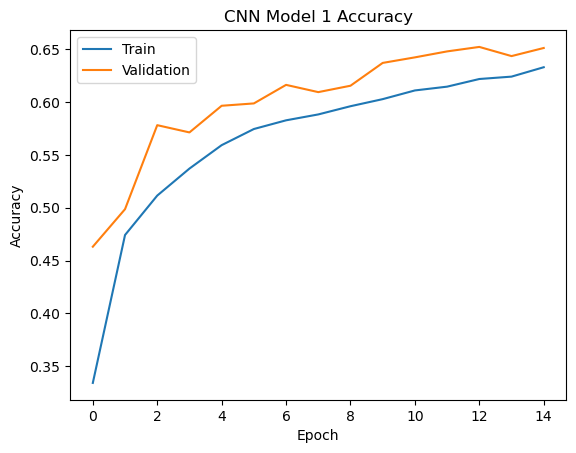

In [80]:
# Importing relevant libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the Training and Validation accuracies of CNN model 2
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

### Trying out with Greyscale dataset

In [22]:
# Clearing backend
backend.clear_session()

# Reset seed for number generators using reset_seed() function
reset_seed(fixed_seed)

Random number generators seed has been set to 42


In [23]:
# ModelCheckpoint is used to save the model at certain intervals
checkpoint_grayscale1 = ModelCheckpoint("model1_grayscale.h5",     # file path where the model will be saved
                             monitor='val_accuracy', # means the callback monitors the validation accuracy
                             verbose=1,         # model is saved only when the metric (val_acc) has improved
                             save_best_only=True,
                             mode='max')

# Configured callbacks will be passed to the model during training
callbacks_list_grayscale1 = [early_stopping, checkpoint_grayscale1, reduce_learningrate]

# Number of iterations over the entire dataset that the training process should run
epochs = 20

In [24]:
# Building the model
model1_gray = cnn_model_1(1)
# Print first model's summary
model1_gray.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0

In [27]:
# Fitting the model with required parameters above, saving model into history variable
history_grayscale1 = model1_gray.fit(
    train_set_gray,
    steps_per_epoch = train_set_gray.samples // train_set_gray.batch_size,
    validation_data = validation_set_gray,
    validation_steps = validation_set_gray.samples // validation_set_gray.batch_size,
    epochs = 20,
    verbose = 1,
    callbacks = callbacks_list_grayscale1
)

Epoch 1/20
472/472 [==============================] - ETA: 0s - loss: 1.3379 - accuracy: 0.3391
Epoch 1: val_accuracy improved from -inf to 0.46875, saving model to model1_grayscale.h5
472/472 [==============================] - 13s 27ms/step - loss: 1.3379 - accuracy: 0.3391 - val_loss: 1.2111 - val_accuracy: 0.4688 - lr: 0.0010
Epoch 2/20
  5/472 [..............................] - ETA: 14s - loss: 1.2863 - accuracy: 0.4000

/Users/ceb/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


471/472 [============================>.] - ETA: 0s - loss: 1.2135 - accuracy: 0.4542
Epoch 2: val_accuracy improved from 0.46875 to 0.51552, saving model to model1_grayscale.h5
472/472 [==============================] - 12s 26ms/step - loss: 1.2135 - accuracy: 0.4541 - val_loss: 1.1344 - val_accuracy: 0.5155 - lr: 0.0010
Epoch 3/20
471/472 [============================>.] - ETA: 0s - loss: 1.1304 - accuracy: 0.4964
Epoch 3: val_accuracy improved from 0.51552 to 0.55625, saving model to model1_grayscale.h5
472/472 [==============================] - 13s 27ms/step - loss: 1.1303 - accuracy: 0.4964 - val_loss: 1.0474 - val_accuracy: 0.5562 - lr: 0.0010
Epoch 4/20
472/472 [==============================] - ETA: 0s - loss: 1.0900 - accuracy: 0.5176
Epoch 4: val_accuracy did not improve from 0.55625
472/472 [==============================] - 12s 25ms/step - loss: 1.0900 - accuracy: 0.5176 - val_loss: 1.0598 - val_accuracy: 0.5482 - lr: 0.0010
Epoch 5/20
472/472 [==============================

In [28]:
# Load the saved model if notebook session gets disconnected
model1_gray = load_model("model1_grayscale.h5")

In [29]:
# Evaluate the model on the test data using Grayscale
test_loss, test_accuracy = model1_gray.evaluate(test_set_gray, verbose=1)

# Print the results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 [==============================] - 0s 15ms/step - loss: 0.8388 - accuracy: 0.5938
Test Loss: 0.838821530342102
Test Accuracy: 0.59375


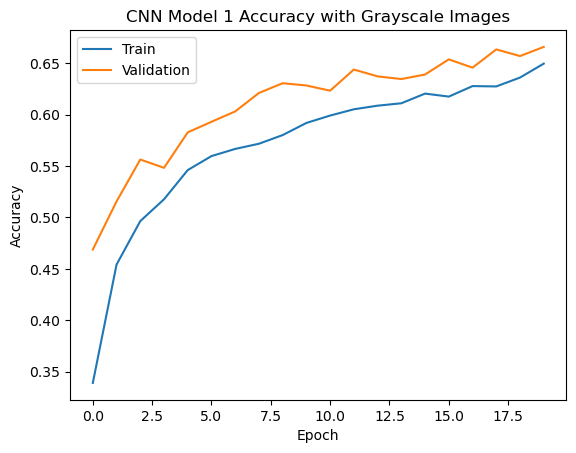

In [30]:
# Plotting the Training and Validation accuracies of CNN model 1 and Grayscale images
plt.plot(history_grayscale1.history['accuracy'])
plt.plot(history_grayscale1.history['val_accuracy'])
plt.title('CNN Model 1 Accuracy with Grayscale Images')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Observations and Insights:**

- **The Greyscale model has performed slightly better than the RGB model in training and validation, with a slightly faster processing time per epoch as well.**
    - RGB: 63% training accuracy, 65% validation accuracy.
    - Greyscale: 64.9% training accuracy, 66.5% validation accuracy.
- **The use of Convolutional Neural Networks (CNNs) is the correct approach vs Artificial Neural Networks (ANNs). For image-based tasks, CNNs are more suitable than ANNs, because CNNs are specifically designed to process pixel data and can capture spatial hierarchies in images, which ANNs cannot efficiently do.**
- **Given that the images in the dataset are inherently grayscale, using an RGB model may not have been the most efficient approach. RGB models are designed to process and learn from color information, which is absent in this case. This could partly explain why the grayscale model outperformed the RGB model.**
- **The grayscale model's higher accuracy (66.57% in validation) as compared to the RGB model (65.10% in validation) indicates that it is more suited to this specific dataset. Perhaps due to images being originally greyscale, the model can focus on learning and extracting relevant features directly related to intensity and texture without the distraction of non-existent color information.**
- **Processing grayscale images requires less computational power and memory compared to RGB images. This makes the grayscale model more resource-efficient, which is particularly advantageous when working with large datasets or limited computational resources.**
- **Further experiments and model optimizations should focus on grayscale models. Additionally, exploring various architectures and hyperparameters specifically tailored for grayscale image processing could yield further improvements in accuracy.**
- **The accuracy plot shows that the models haven't platoed in terms of efficiency improvement over the epochs. Perhaps relaxing the conditions at which Tensorflow stops the training could have allowed the model to continue to improve over time.**

### **Creating the second Convolutional Neural Network**

- Try out a slightly larger architecture

In [137]:
# Clearing backend
backend.clear_session()

# Reset seed for number generators using reset_seed() function
reset_seed(fixed_seed)

Random number generators seed has been set to 42


In [138]:
# Define more complex CNN model
def cnn_model_2(colour_layers):
    cnn_model = Sequential()

    # First Convolutional layer with 256 filters and the kernel size of 3x3, 'same' padding and input shape = (48, 48, 3 - RGB colours)
    cnn_model.add(Conv2D(filters = 256, kernel_size = (2, 2), padding = "same", input_shape = (img_size[0], img_size[1], colour_layers), activation = 'relu'))
    # Adding a BatchNormalization layer
    cnn_model.add(BatchNormalization())
    # LeakyRelU layer with Leaky ReLU parameter of 0.1
    cnn_model.add(LeakyReLU(0.1))
    # A max-pooling layer with a pool size of 2x2
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    # Second Convolutional layer with 128 filters and the kernel size of 2x2 with 'same' padding
    cnn_model.add(Conv2D(filters = 128, kernel_size = (2, 2), padding = "same", activation = 'relu'))
    # Adding a BatchNormalization layer
    cnn_model.add(BatchNormalization())
    # LeakyRelU layer with Leaky ReLU parameter of 0.1
    cnn_model.add(LeakyReLU(0.1))
    # A max-pooling layer with a pool size of 2x2
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    # Third Convolutional layer with 32 filters and the kernel size of 2x2 with 'same' padding
    cnn_model.add(Conv2D(filters = 64, kernel_size = (2, 2), padding = "same", activation = 'relu'))
    # Adding a BatchNormalization layer
    cnn_model.add(BatchNormalization())
    # LeakyRelU layer with Leaky ReLU parameter of 0.1
    cnn_model.add(LeakyReLU(0.1))
    # A max-pooling layer with a pool size of 2x2
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    # Fourth Convolutional layer with 32 filters and the kernel size of 2x2 with 'same' padding
    cnn_model.add(Conv2D(filters = 32, kernel_size = (2, 2), padding = "same", activation = 'relu'))
    # Adding a BatchNormalization layer
    cnn_model.add(BatchNormalization())
    # LeakyRelU layer with Leaky ReLU parameter of 0.1
    cnn_model.add(LeakyReLU(0.1))
    # A max-pooling layer with a pool size of 2x2
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    # Flatten the output from the previous layer
    cnn_model.add(Flatten())
    # Dense layer with 512 nodes
    cnn_model.add(Dense(512, activation = 'relu'))
    # Dense layer with 128 nodes
    cnn_model.add(Dense(128, activation = 'relu'))
    # Dropout layer with the rate equal to 0.4
    cnn_model.add(Dropout(0.4))
    # Final output layer with nodes equal to the number of classes (sad, happy, neutral and surprised) and 'softmax' as the activation function
    cnn_model.add(Dense(4, activation = 'softmax'))
    # Compiling the CNN model with categorical crossentropy as loss function, Adam Optimizer
    # with 0.001 learning rate, and set metrics set to 'accuracy'.
    cnn_model.compile(loss='categorical_crossentropy',
              optimizer=legacy.Adam(learning_rate = 0.001),
              metrics=['accuracy'])
    return cnn_model

### **Compiling and Training the Model**

In [27]:
# Building the model
model2_rgb = cnn_model_2(3)
# Print first model's summary
model2_rgb.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 256)       3328      
                                                                 
 batch_normalization (Batch  (None, 48, 48, 256)       1024      
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       131200    
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 128)       5

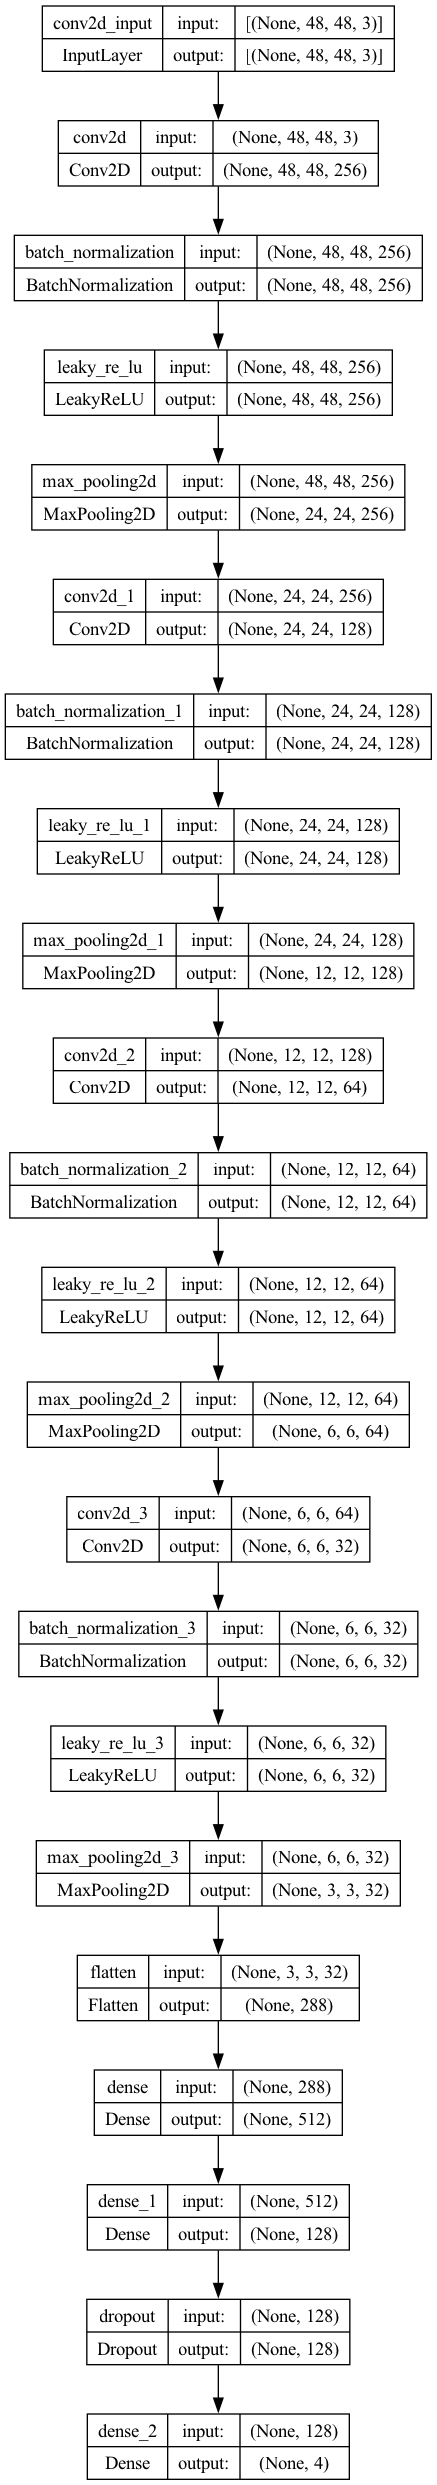

In [28]:
# Visualize the model as blocks
plot_model(model2_rgb, to_file='model.png', show_shapes=True, show_layer_names=True)

In [87]:
# ModelCheckpoint is used to save the model at certain intervals
checkpoint_model2_rgb = ModelCheckpoint("model2_rgb.h5", # file path where the model will be saved
                             monitor='val_accuracy',  # means the callback monitors the validation accuracy
                             verbose=1,               # model is saved only when the metric (val_acc) has improved
                             save_best_only=True,
                             mode='max')

# Configured callbacks will be passed to the model during training
callbacks_list_model2_rgb = [early_stopping, checkpoint_model2_rgb, reduce_learningrate]

# Number of iterations over the entire dataset that the training process should run
epochs = 20

In [35]:
# Fitting the model with required parameters above, saving model into history_model2 variable
history_model2_rgb = model2_rgb.fit(
    train_set_rgb,
    steps_per_epoch = train_set_rgb.samples // train_set_rgb.batch_size,
    validation_data = validation_set_rgb,
    validation_steps = validation_set_rgb.samples // validation_set_rgb.batch_size,
    epochs = 20,
    verbose = 1,
    callbacks = callbacks_list_model2_rgb
)

Epoch 1/20
472/472 [==============================] - ETA: 0s - loss: 1.3467 - accuracy: 0.3299
Epoch 1: val_accuracy improved from -inf to 0.37036, saving model to model2_rgb.h5
472/472 [==============================] - 83s 175ms/step - loss: 1.3467 - accuracy: 0.3299 - val_loss: 1.3109 - val_accuracy: 0.3704 - lr: 0.0010
Epoch 2/20
472/472 [==============================] - ETA: 0s - loss: 1.2211 - accuracy: 0.4125
Epoch 2: val_accuracy improved from 0.37036 to 0.42702, saving model to model2_rgb.h5
472/472 [==============================] - 81s 172ms/step - loss: 1.2211 - accuracy: 0.4125 - val_loss: 1.1961 - val_accuracy: 0.4270 - lr: 0.0010
Epoch 3/20
472/472 [==============================] - ETA: 0s - loss: 1.1291 - accuracy: 0.4863
Epoch 3: val_accuracy improved from 0.42702 to 0.47520, saving model to model2_rgb.h5
472/472 [==============================] - 82s 173ms/step - loss: 1.1291 - accuracy: 0.4863 - val_loss: 1.1530 - val_accuracy: 0.4752 - lr: 0.0010
Epoch 4/20
472/4

### **Evaluating the Model on the Test Set**

In [ ]:
# Load the saved model if notebook session gets disconnected
model2_rgb = load_model("model2_rgb.h5")

In [36]:
# Evaluate the model on the test data using RGB model
test_loss, test_accuracy = model2_rgb.evaluate(test_set_rgb, verbose=1)

# Print the results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 [==============================] - 0s 45ms/step - loss: 0.7281 - accuracy: 0.6719
Test Loss: 0.728143572807312
Test Accuracy: 0.671875


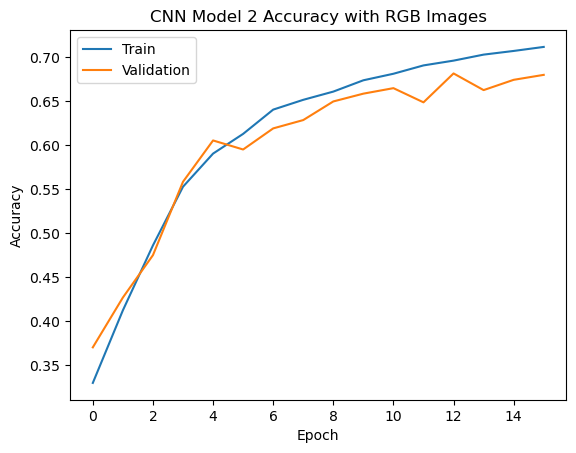

In [37]:
# Plotting the Training and Validation accuracies of CNN model 2 and RGB images
plt.plot(history_model2_rgb.history['accuracy'])
plt.plot(history_model2_rgb.history['val_accuracy'])
plt.title('CNN Model 2 Accuracy with RGB Images')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

### Trying out Model 2 with Greyscale dataset

In [119]:
# Clearing backend
backend.clear_session()

# Reset seed for number generators using reset_seed() function
reset_seed(fixed_seed)

Random number generators seed has been set to 42


In [120]:
# ModelCheckpoint is used to save the model at certain intervals
checkpoint_model2_gray = ModelCheckpoint("model2_grayscale.h5",  # file path where the model will be saved
                             monitor='val_accuracy',          # means the callback monitors the validation accuracy
                             verbose=1,                       # model is saved only when the metric (val_acc) has improved
                             save_best_only=True,
                             mode='max')

# Configured callbacks will be passed to the model during training
callbacks_list_model2_gray = [early_stopping, checkpoint_model2_gray, reduce_learningrate]

# Number of iterations over the entire dataset that the training process should run
epochs = 20

In [121]:
# Building the model
model2_gray = cnn_model_2(1)
# Print first model's summary
model2_gray.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 256)       1280      
                                                                 
 batch_normalization (Batch  (None, 48, 48, 256)       1024      
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       131200    
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 128)       5

In [122]:
# Fitting the model with required parameters above, saving model into history_model2_gray variable
history_model2_gray = model2_gray.fit(
    train_set_gray,
    steps_per_epoch = train_set_gray.samples // train_set_gray.batch_size,
    validation_data = validation_set_gray,
    validation_steps = validation_set_gray.samples // validation_set_gray.batch_size,
    epochs = 20,
    verbose = 1,
    callbacks = callbacks_list_model2_gray
)

Epoch 1/20
472/472 [==============================] - ETA: 0s - loss: 1.3722 - accuracy: 0.3058
Epoch 1: val_accuracy improved from -inf to 0.39980, saving model to model2_grayscale.h5
472/472 [==============================] - 85s 180ms/step - loss: 1.3722 - accuracy: 0.3058 - val_loss: 1.3364 - val_accuracy: 0.3998 - lr: 0.0010
Epoch 2/20
472/472 [==============================] - ETA: 0s - loss: 1.2458 - accuracy: 0.3947
Epoch 2: val_accuracy improved from 0.39980 to 0.44214, saving model to model2_grayscale.h5
472/472 [==============================] - 86s 182ms/step - loss: 1.2458 - accuracy: 0.3947 - val_loss: 1.2179 - val_accuracy: 0.4421 - lr: 0.0010
Epoch 3/20
472/472 [==============================] - ETA: 0s - loss: 1.1441 - accuracy: 0.4674
Epoch 3: val_accuracy improved from 0.44214 to 0.44738, saving model to model2_grayscale.h5
472/472 [==============================] - 86s 182ms/step - loss: 1.1441 - accuracy: 0.4674 - val_loss: 1.1624 - val_accuracy: 0.4474 - lr: 0.001

In [ ]:
# Load the saved model if notebook session gets disconnected
model2_gray = load_model("model2_grayscale.h5")

In [42]:
# Evaluate the model on the test data using Grayscale model
test_loss, test_accuracy = model2_gray.evaluate(test_set_gray, verbose=1)

# Print the results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 [==============================] - 0s 40ms/step - loss: 0.7769 - accuracy: 0.6250
Test Loss: 0.7768638134002686
Test Accuracy: 0.625


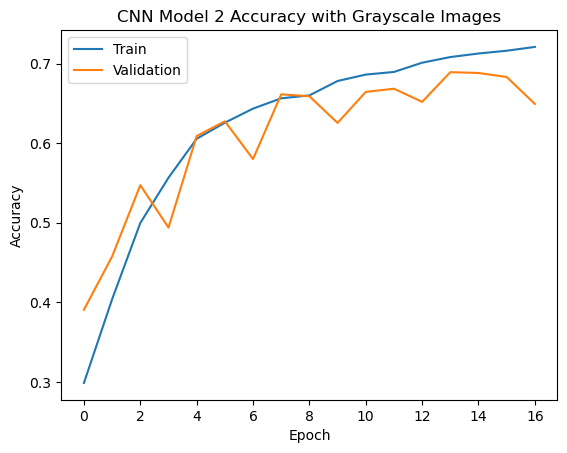

In [43]:
# Plotting the Training and Validation accuracies of CNN model 2 and Grayscale images
plt.plot(history_model2_gray.history['accuracy'])
plt.plot(history_model2_gray.history['val_accuracy'])
plt.title('CNN Model 2 Accuracy with Grayscale Images')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Observations and Insights:**

- **The Greyscale model and RGB model have performed very similarly in both training and in validation.**
    - RGB: 71.2% training accuracy, 68.2% validation accuracy.
    - Greyscale: 71.1% training accuracy, 68% validation accuracy.
- **Considering that the training has stopped early at epoch 15, it might be worth considering relaxing the conditions for the early stopping in an effort of improving the accuracy of the network with further training.**
- **A slightly faster processing time per epoch would allow us to train the Grayscale model further, therefore I would select the Greyscale model as opposed to the RGB model.**
- **Not only the Greyscale model processing time is slightly faster, but also more suitable for its input dataset images which are in Greyscale originally.**
- **Again, the accuracy plot shows that the models haven't potentially platoed in terms of efficiency improvement over the epochs. Perhaps relaxing the conditions at which Tensorflow stops the training could have allowed the model to continue to improve over time.**

### The Greyscale models have performed very similarly to RGB models in both situations where the CNN was less or more complex. With the points above in mind, I would pick the more complex Greyscale model, considering that the processing time is slightly less when compared to RGB models and that the images in the dataset are originally in Greyscale.

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [29]:
# Creating dataloader for train for RGB dataset
train_set_pre = datagen.flow_from_directory(folder_path + "train",
                                        target_size = (img_size),
                                        color_mode = 'rgb',
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        classes = ['happy', 'sad', 'neutral', 'surprise'],
                                        shuffle = True)

# Creating dataloader for validation for RGB dataset
validation_set_pre = datagen.flow_from_directory(folder_path + "validation",
                                        target_size = (img_size),
                                        color_mode = 'rgb',
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        classes = ['happy', 'sad', 'neutral', 'surprise'],
                                        shuffle = True)

# Creating dataloader for test for RGB dataset
test_set_pre = datagen.flow_from_directory(folder_path + "test",
                                        target_size = (img_size),
                                        color_mode = 'rgb',
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        classes = ['happy', 'sad', 'neutral', 'surprise'],
                                        shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [30]:
# Clearing backend
backend.clear_session()

# Reset seed for number generators using reset_seed() function
reset_seed(fixed_seed)

Random number generators seed has been set to 42


### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [31]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, Input

# Load the VGG16 model without top layers
vgg_base = VGG16(include_top=False, 
                 weights='imagenet', 
                 input_tensor=Input(shape=(img_size[0],img_size[1], 3)))

# Set the VGG16 model to be non-trainable
vgg_base.trainable = False

# Rebuild the model
x = vgg_base.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
pred = Dense(4, activation='softmax')(x)

# Create a new model
vggmodel = Model(inputs=vgg_base.input, outputs=pred)

# Print the model summary
vggmodel.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

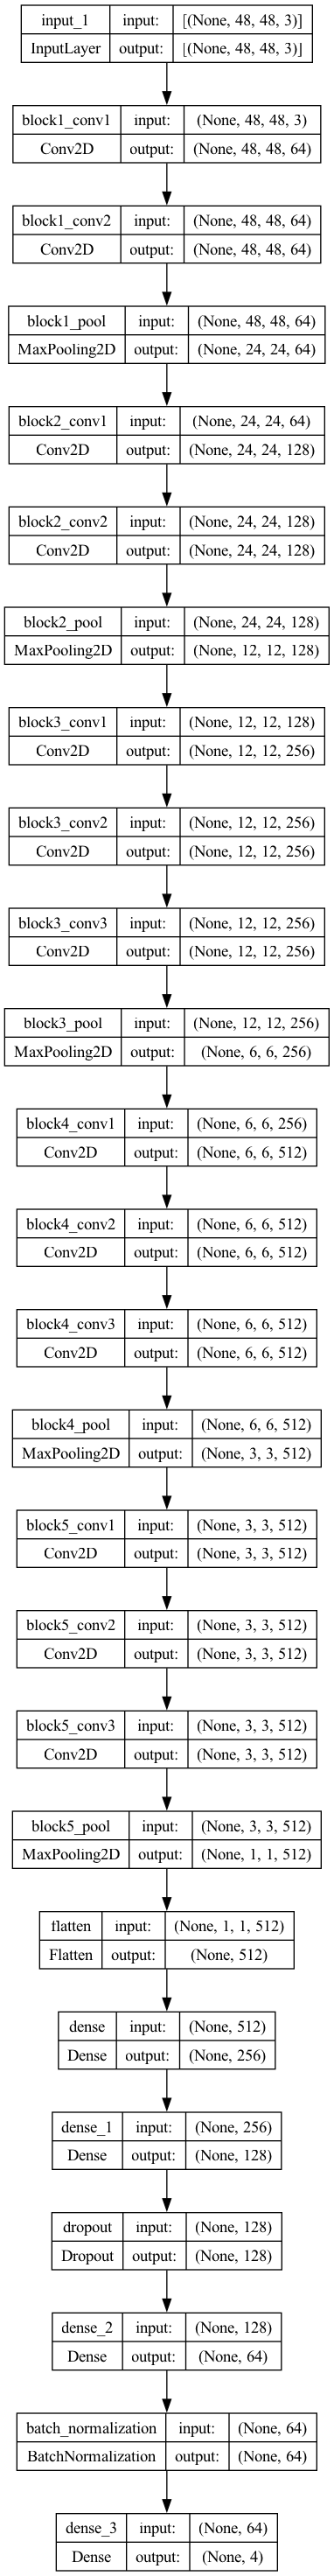

In [32]:
# Visualize the model as blocks
plot_model(vggmodel, to_file='model.png', show_shapes=True, show_layer_names=True)

### **Compiling and Training the VGG16 Model**

In [94]:
# ModelCheckpoint is used to save the model at certain intervals
checkpoint_vgg = ModelCheckpoint("vggmodel.h5", # file path where the model will be saved
                             monitor='val_accuracy',  # means the callback monitors the validation accuracy
                             verbose=1,               # model is saved only when the metric (val_acc) has improved
                             save_best_only=True,
                             mode='max')

# Configured callbacks will be passed to the model during training
callbacks_list_vgg = [early_stopping, checkpoint_vgg, reduce_learningrate]

# Number of iterations over the entire dataset that the training process should run
epochs = 20

In [95]:
# Compiling the CNN model with categorical crossentropy as loss function, Adam Optimizer
# with 0.001 learning rate, and set metrics set to 'accuracy'.
vggmodel.compile(loss='categorical_crossentropy',
          optimizer=legacy.Adam(learning_rate = 0.001),
          metrics=['accuracy'])

In [69]:
# Fitting the model with required parameters above, saving model into history_vgg variable
history_vgg = vggmodel.fit(
    train_set_pre,
    steps_per_epoch = train_set_pre.samples // train_set_pre.batch_size,
    validation_data = validation_set_pre,
    validation_steps = validation_set_pre.samples // validation_set_pre.batch_size,
    epochs = 20,
    verbose = 1,
    callbacks = callbacks_list_vgg
)

Epoch 1/20
472/472 [==============================] - ETA: 0s - loss: 1.3230 - accuracy: 0.3808
Epoch 1: val_accuracy improved from -inf to 0.41250, saving model to vggmodel.h5
472/472 [==============================] - 110s 233ms/step - loss: 1.3230 - accuracy: 0.3808 - val_loss: 1.2388 - val_accuracy: 0.4125 - lr: 0.0010
Epoch 2/20


/Users/ceb/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


472/472 [==============================] - ETA: 0s - loss: 1.2147 - accuracy: 0.4441
Epoch 2: val_accuracy improved from 0.41250 to 0.48629, saving model to vggmodel.h5
472/472 [==============================] - 104s 219ms/step - loss: 1.2147 - accuracy: 0.4441 - val_loss: 1.1530 - val_accuracy: 0.4863 - lr: 0.0010
Epoch 3/20
472/472 [==============================] - ETA: 0s - loss: 1.1849 - accuracy: 0.4615
Epoch 3: val_accuracy improved from 0.48629 to 0.50121, saving model to vggmodel.h5
472/472 [==============================] - 95s 202ms/step - loss: 1.1849 - accuracy: 0.4615 - val_loss: 1.1402 - val_accuracy: 0.5012 - lr: 0.0010
Epoch 4/20
472/472 [==============================] - ETA: 0s - loss: 1.1698 - accuracy: 0.4722
Epoch 4: val_accuracy did not improve from 0.50121
472/472 [==============================] - 97s 206ms/step - loss: 1.1698 - accuracy: 0.4722 - val_loss: 1.1603 - val_accuracy: 0.4645 - lr: 0.0010
Epoch 5/20
472/472 [==============================] - ETA: 0s 

### **Evaluating the VGG16 model**

In [ ]:
# Load the saved model if notebook session gets disconnected
vggmodel = load_model("vggmodel.h5")

In [70]:
# Evaluate the model on the test data
test_loss, test_accuracy = vggmodel.evaluate(test_set_pre, verbose=1)

# Print the results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 [==============================] - 1s 158ms/step - loss: 1.2255 - accuracy: 0.4453
Test Loss: 1.225456714630127
Test Accuracy: 0.4453125


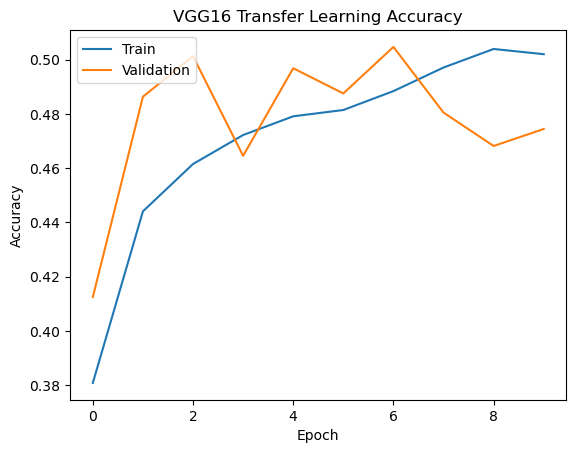

In [71]:
# Plotting the Training and Validation accuracies of VGG16
plt.plot(history_vgg.history['accuracy'])
plt.plot(history_vgg.history['val_accuracy'])
plt.title('VGG16 Transfer Learning Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Observations and Insights:**

- **Although training time has very significantly increased, the VGG16 model has performed significantly worse in both training and validation than our custom CNN model for Greyscale images previously chosen.**
    - Chosen CNN for Greyscale images: 71.1% training accuracy, 68% validation accuracy.
    - VGG16: 50.2% training accuracy, 47.4% validation accuracy.
- **The decrease in validation accuracy in later epochs could be indicative of overfitting, where the model becomes too tailored to the training data and loses its predictive power on new, unseen data.**
- **Training has stopped very prematurely due to Learning Rate platoeing. Perhaps relaxing the conditions at which the condition is met might allow the model to improve its performance over time or could lead to further overfitting.**

### The VGG16 model hasn't performed better than our selected CNN Model for Greyscale images. An early stopping was triggered at epoch 10, which might have been due to the model not generalising enough for the task. Considering the above, the CNN Model for Greyscale images is still the best performing model thus far.

## **ResNet V2 Model**

In [33]:
# Clearing backend
backend.clear_session()

# Reset seed for number generators using reset_seed() function
reset_seed(fixed_seed)

Random number generators seed has been set to 42


In [34]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D

# Load the ResNet50 model without its top layers and with pre-trained ImageNet weights
Resnet = ResNet50(include_top=False, weights='imagenet', input_tensor=tf.keras.Input(shape=(img_size[0], img_size[1], 3)))

# Print imported model's summary
Resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 54, 54, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 24, 24, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 24, 24, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 12, 12, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 12, 12, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 12, 12, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 6, 6, 512)            66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 6, 6, 512)            2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 6, 6, 512)            0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 3, 3, 256)            590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 3, 3, 256)            0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 3, 3, 1024)           525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 3, 3, 1024)           0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 3, 3, 256)            262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 3, 3, 1024)           4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 3, 3, 1024)           0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 3, 3, 1024)           0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 2, 2, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 2, 2, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 2, 2, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 2, 2, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

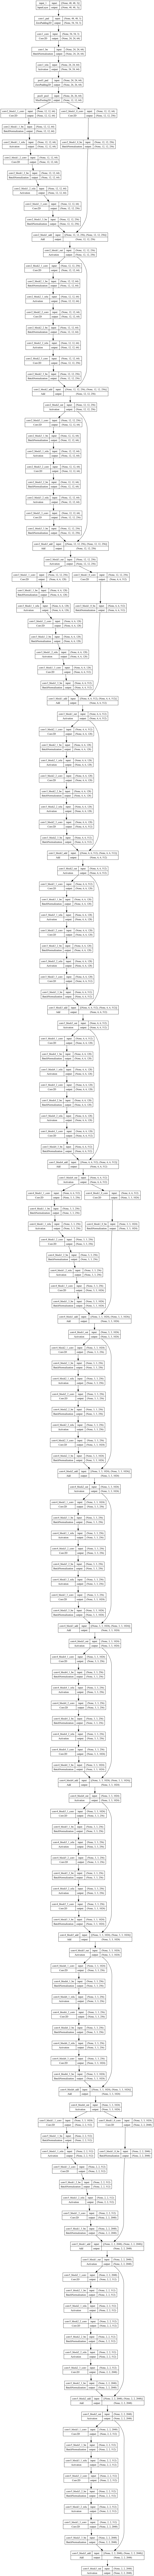

In [35]:
# Visualize the model as blocks
plot_model(Resnet, to_file='model.png', show_shapes=True, show_layer_names=True)

### **Model Building**

In [98]:
# Set ResNet layers to non-trainable
Resnet.trainable = False

# Rebuild the model
x = Resnet.output
# Add Global Average Pooling layer
x = GlobalAveragePooling2D()(x)

# Flatten the output
x = Flatten()(x)

# Add a Dense layer with 256 neurons
x = Dense(256, activation='relu')(x)

# Add a Dense Layer with 128 neurons
x = Dense(128, activation='relu')(x)

# Add a DropOut layer with a drop out ratio of 0.3
x = Dropout(0.3)(x)

# Add a Dense Layer with 64 neurons
x = Dense(64, activation='relu')(x)

# Add a Batch Normalization layer
x = BatchNormalization()(x)

# Add the final dense layer with 4 neurons and 'softmax' activation for multi-class classification
pred = Dense(4, activation='softmax')(x)

# Initializing the model
resnetmodel = Model(inputs=Resnet.input, outputs=pred)

### **Compiling and Training the Model**

In [99]:
# ModelCheckpoint is used to save the model at certain intervals
checkpoint_resnet = ModelCheckpoint("resnet.h5", # file path where the model will be saved
                    monitor='val_accuracy',  # means the callback monitors the validation accuracy
                    verbose=1,               # model is saved only when the metric (val_acc) has improved
                    save_best_only=True,
                    mode='max')

# Configured callbacks will be passed to the model during training
callbacks_list_resnet = [early_stopping, checkpoint_resnet, reduce_learningrate]

# Number of iterations over the entire dataset that the training process should run
epochs = 20

In [100]:
# Compiling the CNN model with categorical crossentropy as loss function, Adam Optimizer
# with 0.001 learning rate, and set metrics set to 'accuracy'.
resnetmodel.compile(loss='categorical_crossentropy',
          optimizer=legacy.Adam(learning_rate = 0.001),
          metrics=['accuracy'])

In [89]:
# Fitting the model with required parameters above, saving model into history_resnet variable
history_resnet = resnetmodel.fit(
    train_set_pre,
    steps_per_epoch = train_set_pre.samples // train_set_pre.batch_size,
    validation_data = validation_set_pre,
    validation_steps = validation_set_pre.samples // validation_set_pre.batch_size,
    epochs = 20,
    verbose = 1,
    callbacks = callbacks_list_resnet
)

Epoch 1/20
472/472 [==============================] - ETA: 0s - loss: 1.4481 - accuracy: 0.2605
Epoch 1: val_accuracy improved from -inf to 0.36996, saving model to resnet.h5
472/472 [==============================] - 47s 96ms/step - loss: 1.4481 - accuracy: 0.2605 - val_loss: 1.3482 - val_accuracy: 0.3700 - lr: 0.0010
Epoch 2/20
472/472 [==============================] - ETA: 0s - loss: 1.3908 - accuracy: 0.2780
Epoch 2: val_accuracy did not improve from 0.36996
472/472 [==============================] - 47s 99ms/step - loss: 1.3908 - accuracy: 0.2780 - val_loss: 1.3547 - val_accuracy: 0.2639 - lr: 0.0010
Epoch 3/20
472/472 [==============================] - ETA: 0s - loss: 1.3560 - accuracy: 0.3034
Epoch 3: val_accuracy did not improve from 0.36996
472/472 [==============================] - 51s 107ms/step - loss: 1.3560 - accuracy: 0.3034 - val_loss: 1.3632 - val_accuracy: 0.2653 - lr: 0.0010
Epoch 4/20
472/472 [==============================] - ETA: 0s - loss: 1.3313 - accuracy: 0.3

### **Evaluating the ResNet Model**

In [ ]:
# Load the saved model if notebook session gets disconnected
resnetmodel = load_model("resnet.h5")

In [90]:
# Evaluate the model on the test data
test_loss, test_accuracy = resnetmodel.evaluate(test_set_pre, verbose=1)

# Print the results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 [==============================] - 0s 80ms/step - loss: 1.3008 - accuracy: 0.3750
Test Loss: 1.300801396369934
Test Accuracy: 0.375


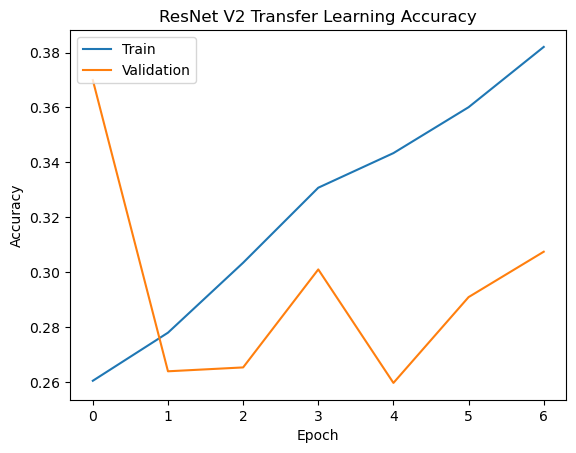

In [91]:
# Plotting the Training and Validation accuracies of ResNet V2
plt.plot(history_resnet.history['accuracy'])
plt.plot(history_resnet.history['val_accuracy'])
plt.title('ResNet V2 Transfer Learning Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Observations and Insights:**

- **ResnetV2 model has performed significantly worse in both training and validation than our custom CNN model for Greyscale images previously chosen.**
    - Chosen CNN for Greyscale images: 71.1% training accuracy, 68% validation accuracy.
    - VGG16: 38.2% training accuracy, 30.75% validation accuracy.
- **Training has stopped very prematurely due to Learning Rate platoeing, which might indicate early overfitting from a model that does not generalises enough for this task. Perhaps relaxing the conditions at which the condition is met might allow the model to improve its performance over time or could lead to further overfitting.**

### ResnetV2 model hasn't performed better than our selected CNN Model for Greyscale images. An early stopping was triggered at a very early epoch 7, which might have been due to the model not generalising enough for the task. Considering the above, the CNN Model for Greyscale images is still the best performing model thus far.

## **EfficientNet Model**

In [36]:
# Clearing backend
backend.clear_session()

# Reset seed for number generators using reset_seed() function
reset_seed(fixed_seed)

Random number generators seed has been set to 42


In [37]:
# Importing EfficientNet Model libraries
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model

# Variable 'EfficientNet' will contain the EfficientNet model
EfficientNet = ap.EfficientNetV2B2(include_top=False,
                                   weights="imagenet", 
                                   input_shape= (img_size[0], img_size[1], 3))
# Print imported model's summary
EfficientNet.summary()

Model: "efficientnetv2-b2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 48, 48, 3)            0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 48, 48, 3)            0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2D)          (None, 24, 24, 32)           864       ['normalizatio

                                                                                                  
 block2c_expand_activation   (None, 12, 12, 128)          0         ['block2c_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block2c_project_conv (Conv  (None, 12, 12, 32)           4096      ['block2c_expand_activation[0]
 2D)                                                                [0]']                         
                                                                                                  
 block2c_project_bn (BatchN  (None, 12, 12, 32)           128       ['block2c_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block2c_d

 tion)                                                                                            
                                                                                                  
 block4a_activation (Activa  (None, 3, 3, 224)            0         ['block4a_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block4a_se_squeeze (Global  (None, 224)                  0         ['block4a_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block4a_se_reshape (Reshap  (None, 1, 1, 224)            0         ['block4a_se_squeeze[0][0]']  
 e)                                                                                               
          

                                                                                                  
 block4c_se_squeeze (Global  (None, 416)                  0         ['block4c_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block4c_se_reshape (Reshap  (None, 1, 1, 416)            0         ['block4c_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block4c_se_reduce (Conv2D)  (None, 1, 1, 26)             10842     ['block4c_se_reshape[0][0]']  
                                                                                                  
 block4c_se_expand (Conv2D)  (None, 1, 1, 416)            11232     ['block4c_se_reduce[0][0]']   
          

 tion)                                                                                            
                                                                                                  
 block5a_se_squeeze (Global  (None, 624)                  0         ['block5a_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block5a_se_reshape (Reshap  (None, 1, 1, 624)            0         ['block5a_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block5a_se_reduce (Conv2D)  (None, 1, 1, 26)             16250     ['block5a_se_reshape[0][0]']  
                                                                                                  
 block5a_s

                                                                                                  
 block5c_se_reshape (Reshap  (None, 1, 1, 720)            0         ['block5c_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block5c_se_reduce (Conv2D)  (None, 1, 1, 30)             21630     ['block5c_se_reshape[0][0]']  
                                                                                                  
 block5c_se_expand (Conv2D)  (None, 1, 1, 720)            22320     ['block5c_se_reduce[0][0]']   
                                                                                                  
 block5c_se_excite (Multipl  (None, 3, 3, 720)            0         ['block5c_activation[0][0]',  
 y)                                                                  'block5c_se_expand[0][0]']   
          

 AveragePooling2D)                                                                                
                                                                                                  
 block5e_se_reshape (Reshap  (None, 1, 1, 720)            0         ['block5e_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block5e_se_reduce (Conv2D)  (None, 1, 1, 30)             21630     ['block5e_se_reshape[0][0]']  
                                                                                                  
 block5e_se_expand (Conv2D)  (None, 1, 1, 720)            22320     ['block5e_se_reduce[0][0]']   
                                                                                                  
 block5e_se_excite (Multipl  (None, 3, 3, 720)            0         ['block5e_activation[0][0]',  
 y)       

 block6a_se_squeeze (Global  (None, 720)                  0         ['block6a_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block6a_se_reshape (Reshap  (None, 1, 1, 720)            0         ['block6a_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block6a_se_reduce (Conv2D)  (None, 1, 1, 30)             21630     ['block6a_se_reshape[0][0]']  
                                                                                                  
 block6a_se_expand (Conv2D)  (None, 1, 1, 720)            22320     ['block6a_se_reduce[0][0]']   
                                                                                                  
 block6a_s

 e)                                                                                               
                                                                                                  
 block6c_se_reduce (Conv2D)  (None, 1, 1, 52)             64948     ['block6c_se_reshape[0][0]']  
                                                                                                  
 block6c_se_expand (Conv2D)  (None, 1, 1, 1248)           66144     ['block6c_se_reduce[0][0]']   
                                                                                                  
 block6c_se_excite (Multipl  (None, 2, 2, 1248)           0         ['block6c_activation[0][0]',  
 y)                                                                  'block6c_se_expand[0][0]']   
                                                                                                  
 block6c_project_conv (Conv  (None, 2, 2, 208)            259584    ['block6c_se_excite[0][0]']   
 2D)      

 block6e_se_reshape (Reshap  (None, 1, 1, 1248)           0         ['block6e_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block6e_se_reduce (Conv2D)  (None, 1, 1, 52)             64948     ['block6e_se_reshape[0][0]']  
                                                                                                  
 block6e_se_expand (Conv2D)  (None, 1, 1, 1248)           66144     ['block6e_se_reduce[0][0]']   
                                                                                                  
 block6e_se_excite (Multipl  (None, 2, 2, 1248)           0         ['block6e_activation[0][0]',  
 y)                                                                  'block6e_se_expand[0][0]']   
                                                                                                  
 block6e_p

                                                                                                  
 block6g_se_reshape (Reshap  (None, 1, 1, 1248)           0         ['block6g_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block6g_se_reduce (Conv2D)  (None, 1, 1, 52)             64948     ['block6g_se_reshape[0][0]']  
                                                                                                  
 block6g_se_expand (Conv2D)  (None, 1, 1, 1248)           66144     ['block6g_se_reduce[0][0]']   
                                                                                                  
 block6g_se_excite (Multipl  (None, 2, 2, 1248)           0         ['block6g_activation[0][0]',  
 y)                                                                  'block6g_se_expand[0][0]']   
          

 AveragePooling2D)                                                                                
                                                                                                  
 block6i_se_reshape (Reshap  (None, 1, 1, 1248)           0         ['block6i_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block6i_se_reduce (Conv2D)  (None, 1, 1, 52)             64948     ['block6i_se_reshape[0][0]']  
                                                                                                  
 block6i_se_expand (Conv2D)  (None, 1, 1, 1248)           66144     ['block6i_se_reduce[0][0]']   
                                                                                                  
 block6i_se_excite (Multipl  (None, 2, 2, 1248)           0         ['block6i_activation[0][0]',  
 y)       

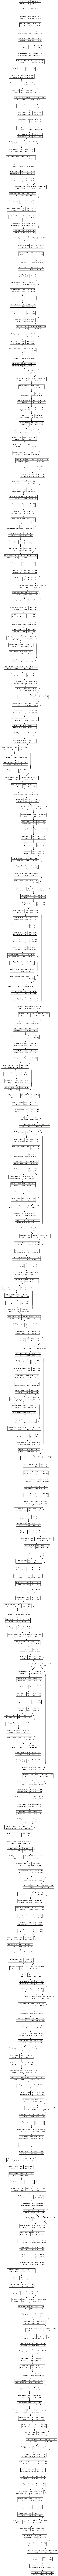

In [38]:
# Visualize the model as blocks
plot_model(EfficientNet, to_file='model.png', show_shapes=True, show_layer_names=True)

### **Model Building**

In [103]:
# Set ResNet layers to non-trainable
EfficientNet.trainable = False

# Rebuild the model
x = EfficientNet.output
# Add Global Average Pooling layer
x = GlobalAveragePooling2D()(x)

# Flatten the output
x = Flatten()(x)

# Add a Dense layer (optional: you can add BatchNormalization and/or Dropout here)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)  # Optional
x = Dropout(0.3)(x)          # Optional

# Add the final Dense layer with 4 neurons and a softmax activation function
pred = Dense(4, activation='softmax')(x)

# Initializing the model
Efficientnetmodel = Model(inputs=EfficientNet.input, outputs=pred)

### **Compiling and Training the Model**

In [104]:
# ModelCheckpoint is used to save the model at certain intervals
checkpoint_efnet = ModelCheckpoint("efnet.h5", # file path where the model will be saved
                    monitor='val_accuracy',  # means the callback monitors the validation accuracy
                    verbose=1,               # model is saved only when the metric (val_acc) has improved
                    save_best_only=True,
                    mode='max')

# Configured callbacks will be passed to the model during training
callbacks_list_efnet = [early_stopping, checkpoint_efnet, reduce_learningrate]

# Number of iterations over the entire dataset that the training process should run
epochs = 20

In [105]:
# Compile the model (This step is required if you're about to train the model)
Efficientnetmodel.compile(loss='categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'])

In [97]:
# Fitting the model with required parameters above, saving model into history_efnet variable
history_efnet = Efficientnetmodel.fit(
    train_set_pre,
    steps_per_epoch = train_set_pre.samples // train_set_pre.batch_size,
    validation_data = validation_set_pre,
    validation_steps = validation_set_pre.samples // validation_set_pre.batch_size,
    epochs = 20,
    verbose = 1,
    callbacks = callbacks_list_efnet
)

Epoch 1/20
472/472 [==============================] - ETA: 0s - loss: 1.4951 - accuracy: 0.2569
Epoch 1: val_accuracy improved from -inf to 0.24435, saving model to efnet.h5
472/472 [==============================] - 27s 52ms/step - loss: 1.4951 - accuracy: 0.2569 - val_loss: 1.7732 - val_accuracy: 0.2444 - lr: 0.0010
Epoch 2/20
472/472 [==============================] - ETA: 0s - loss: 1.4112 - accuracy: 0.2630
Epoch 2: val_accuracy improved from 0.24435 to 0.36673, saving model to efnet.h5
472/472 [==============================] - 24s 52ms/step - loss: 1.4112 - accuracy: 0.2630 - val_loss: 1.3607 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 3/20
471/472 [============================>.] - ETA: 0s - loss: 1.3959 - accuracy: 0.2631
Epoch 3: val_accuracy did not improve from 0.36673
472/472 [==============================] - 23s 50ms/step - loss: 1.3960 - accuracy: 0.2629 - val_loss: 1.3424 - val_accuracy: 0.3665 - lr: 0.0010
Epoch 4/20
471/472 [============================>.] - ETA: 0s - 

### **Evaluating the EfficientnetNet Model**

In [ ]:
# Load the saved model if notebook session gets disconnected
Efficientnetmodel = load_model("efnet.h5")

In [98]:
# Evaluate the model on the test data
test_loss, test_accuracy = Efficientnetmodel.evaluate(test_set_pre, verbose=1)

# Print the results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 [==============================] - 0s 52ms/step - loss: 1.4318 - accuracy: 0.2500
Test Loss: 1.4318348169326782
Test Accuracy: 0.25


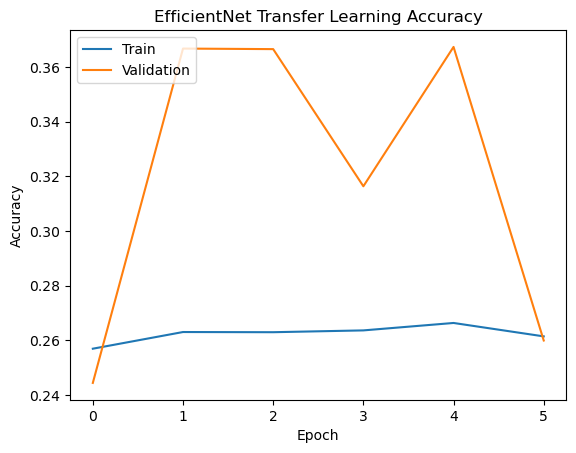

In [99]:
# Plotting the Training and Validation accuracies of EfficientNet model
plt.plot(history_efnet.history['accuracy'])
plt.plot(history_efnet.history['val_accuracy'])
plt.title('EfficientNet Transfer Learning Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Observations and Insights:**

- **EfficientNet model has performed worse in both training and validation than any other model tried in this notebook,but much worse when compared to our custom CNN model for Greyscale images previously chosen.**
    - Chosen CNN for Greyscale images: 71.1% training accuracy, 68% validation accuracy.
    - VGG16: 26.1% training accuracy, 26% validation accuracy.
- **Again, training has stopped very prematurely due to Learning Rate platoeing, which might indicate early overfitting from a model that does not generalises enough for this task. Perhaps relaxing the conditions at which the condition is met might allow the model to improve its performance over time or could lead to further overfitting.**

### EfficientNet model hasn't performed better than our selected CNN Model for Greyscale images. An early stopping was triggered at a very early epoch 6, which might have been due to the model not generalising enough for the task. Considering the above, the CNN Model for Greyscale images is still the best performing model thus far.

## Conclusion
- **The custom CNN model for grayscale images significantly outperforms the transfer learning models (VGG16, ResnetV2, and EfficientNet) in both training and validation accuracies.**
- **Custom CNN for Greyscale images:** 71.1% training accuracy, 68% validation accuracy.
- **VGG16:** 50.2% training accuracy, 47.4% validation accuracy.
- **ResnetV2:** 38.2% training accuracy, 30.75% validation accuracy.
- **EfficientNet:** 26.1% training accuracy, 26% validation accuracy.

### Early stopping due to plateauing learning rates in these models suggests that they are not learning effectively from the dataset, possibly due to over-specialization on their original training data and not adapting well to the new task. 
### It seems like the Pre-trained models are too complex for the task at hands and do not generalise enough, which resulted in poor performance when compared to a custom CNN model. 
## In conclusion, the comparative underperformance of the transfer learning models in this task highlights the importance of aligning model complexity and architecture with the specific characteristics of the dataset and the task at hand. The 'rgb' color mode, while generally beneficial for color images, seems to be less effective for grayscale image datasets, as seen in this case.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [39]:
# Clearing backend
backend.clear_session()

# Reset seed for number generators using reset_seed() function
reset_seed(fixed_seed)

Random number generators seed has been set to 42


In [40]:
# Creating dataloader for train for Greyscale dataset
train_set_gray2 = datagen.flow_from_directory(folder_path + "train",
                                        target_size = (img_size),
                                        color_mode = 'grayscale',
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        classes = ['happy', 'sad', 'neutral', 'surprise'],
                                        shuffle = True)

# Creating dataloader for validation for Greyscale dataset
validation_set_gray2 = datagen.flow_from_directory(folder_path + "validation",
                                        target_size = (img_size),
                                        color_mode = 'grayscale',
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        classes = ['happy', 'sad', 'neutral', 'surprise'],
                                        shuffle = True)

# Creating dataloader for test for Greyscale dataset
test_set_gray2 = datagen.flow_from_directory(folder_path + "test",
                                        target_size = (img_size),
                                        color_mode = 'grayscale',
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        classes = ['happy', 'sad', 'neutral', 'surprise'],
                                        shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [43]:
from keras.layers import Dense, BatchNormalization, Activation, Dropout

# Define more complex CNN model
def complex_cnn():
    cnn_model = Sequential()

    # Building a layer with 5 Convolutional Blocks and see if performance increases
    # Add first Conv2D layer with 64 filters and a kernel size of 2. Use the 'same'
    # padding and provide the input shape = (48, 48, 1). Use 'relu' activation.
    cnn_model.add(Conv2D(filters = 64, 
                         kernel_size = (2, 2), 
                         padding = "same", 
                         input_shape = (img_size[0], img_size[1], 1), activation = 'relu'))
    # Adding a BatchNormalization layer
    cnn_model.add(BatchNormalization())
    # LeakyRelU layer with Leaky ReLU parameter of 0.1
    cnn_model.add(LeakyReLU(0.1))
    # A max-pooling layer with a pool size of 2x2
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    # Dropout layer with the rate equal to 0.2
    cnn_model.add(Dropout(0.2))
    # Second Convolutional layer with 128 filters and the kernel size of 2x2 with 'same' padding
    cnn_model.add(Conv2D(filters = 128, kernel_size = (2, 2), padding = "same", activation = 'relu'))
    # Adding a BatchNormalization layer
    cnn_model.add(BatchNormalization())
    # LeakyRelU layer with Leaky ReLU parameter of 0.1
    cnn_model.add(LeakyReLU(0.1))
    # A max-pooling layer with a pool size of 2x2
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    # Dropout layer with the rate equal to 0.2
    cnn_model.add(Dropout(0.2))
    # Third Convolutional layer with 512 filters and the kernel size of 2x2 with 'same' padding
    cnn_model.add(Conv2D(filters = 512, kernel_size = (2, 2), padding = "same", activation = 'relu'))
    # Adding a BatchNormalization layer
    cnn_model.add(BatchNormalization())
    # LeakyRelU layer with Leaky ReLU parameter of 0.1
    cnn_model.add(LeakyReLU(0.1))
    # A max-pooling layer with a pool size of 2x2
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    # Dropout layer with the rate equal to 0.2
    cnn_model.add(Dropout(0.2))
    # Fourth Convolutional layer with 512 filters and the kernel size of 2x2 with 'same' padding
    cnn_model.add(Conv2D(filters = 512, kernel_size = (2, 2), padding = "same", activation = 'relu'))
    # Adding a BatchNormalization layer
    cnn_model.add(BatchNormalization())
    # LeakyRelU layer with Leaky ReLU parameter of 0.1
    cnn_model.add(LeakyReLU(0.1))
    # A max-pooling layer with a pool size of 2x2
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    # Dropout layer with the rate equal to 0.2
    cnn_model.add(Dropout(0.2))
    # Fifth Convolutional layer with 128 filters and the kernel size of 2x2 with 'same' padding
    cnn_model.add(Conv2D(filters = 128, kernel_size = (2, 2), padding = "same", activation = 'relu'))
    # Adding a BatchNormalization layer
    cnn_model.add(BatchNormalization())
    # LeakyRelU layer with Leaky ReLU parameter of 0.1
    cnn_model.add(LeakyReLU(0.1))
    # A max-pooling layer with a pool size of 2x2
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    # Dropout layer with the rate equal to 0.2
    cnn_model.add(Dropout(0.2))
    # Flatten the output from the previous layer
    cnn_model.add(Flatten())
    # Dense layer with 256 nodes
    cnn_model.add(Dense(256, activation = 'relu'))
    # Adding a BatchNormalization layer
    cnn_model.add(BatchNormalization())
    # Adding a 'relu' Activation layer
    cnn_model.add(Activation('relu'))
    # Dropout layer with the rate equal to 0.2
    cnn_model.add(Dropout(0.2))
    # Dense layer with 512 nodes
    cnn_model.add(Dense(512, activation = 'relu'))
    # Adding a BatchNormalization layer
    cnn_model.add(BatchNormalization())
    # Adding a 'relu' Activation layer
    cnn_model.add(Activation('relu'))
    # Dropout layer with the rate equal to 0.2
    cnn_model.add(Dropout(0.2))
    # Final output layer with nodes equal to the number of classes (sad, happy, neutral and surprised) and 'softmax' as the activation function
    cnn_model.add(Dense(4, activation = 'softmax'))
    # Compiling the CNN model with categorical crossentropy as loss function, Adam Optimizer
    # with 0.001 learning rate, and set metrics set to 'accuracy'.
    cnn_model.compile(loss='categorical_crossentropy',
              optimizer=legacy.Adam(learning_rate = 0.001),
              metrics=['accuracy'])
    return cnn_model

In [44]:
# Building the model
complex_cnn_model = complex_cnn()
# Print first model's summary
complex_cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       3

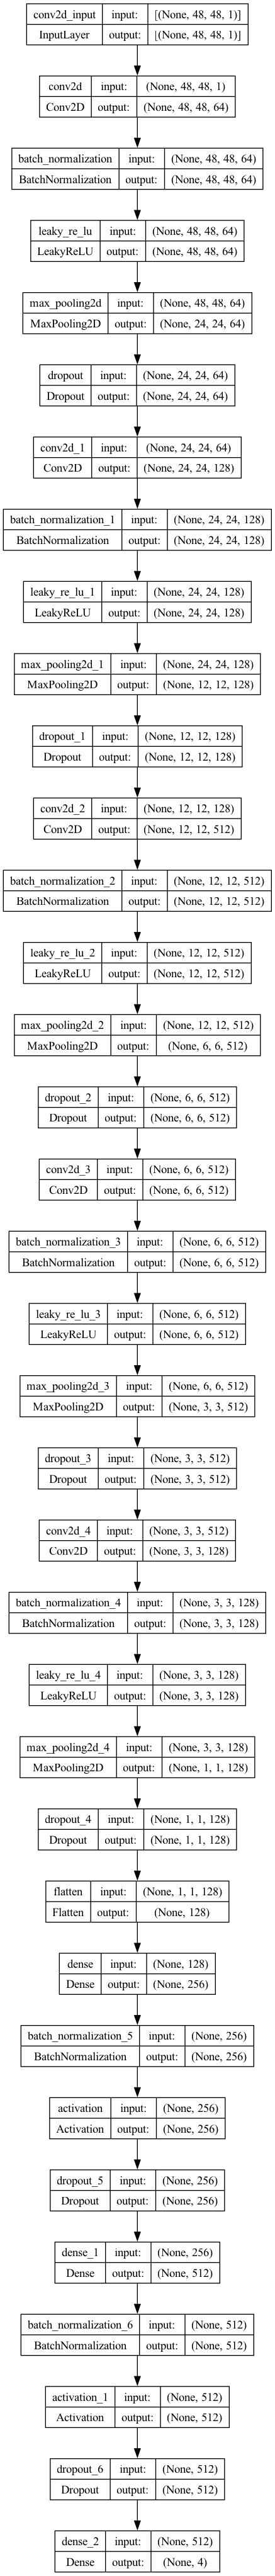

In [45]:
# Visualize the model as blocks
plot_model(complex_cnn_model, to_file='model.png', show_shapes=True, show_layer_names=True)

### **Compiling and Training the Model**

In [109]:
# ModelCheckpoint is used to save the model at certain intervals
checkpoint_complex_cnn = ModelCheckpoint("complex_cnn.h5", # file path where the model will be saved
                             monitor='val_accuracy',  # means the callback monitors the validation accuracy
                             verbose=1,               # model is saved only when the metric (val_acc) has improved
                             save_best_only=True,
                             mode='max')

# Configured callbacks will be passed to the model during training
callbacks_list_complex_cnn = [early_stopping, checkpoint_complex_cnn, reduce_learningrate]

# Number of iterations over the entire dataset that the training process should run
epochs = 35

In [110]:
# Compiling the Complex CNN model with categorical crossentropy as loss function, Adam Optimizer
# with 0.003 learning rate, and set metrics set to 'accuracy'.
complex_cnn_model.compile(loss='categorical_crossentropy',
          optimizer=legacy.Adam(learning_rate = 0.003),
          metrics=['accuracy'])

In [116]:
# Fitting the model with required parameters above, saving model into history_complex_cnn variable
history_complex_cnn = complex_cnn_model.fit(
    train_set_gray2,
    steps_per_epoch = train_set_gray2.samples // train_set_gray2.batch_size,
    validation_data = validation_set_gray2,
    validation_steps = validation_set_gray2.samples // validation_set_gray2.batch_size,
    epochs = 20,
    verbose = 1,
    callbacks = callbacks_list_complex_cnn
)

Epoch 1/20
472/472 [==============================] - ETA: 0s - loss: 1.5206 - accuracy: 0.3041
Epoch 1: val_accuracy improved from -inf to 0.22903, saving model to complex_cnn.h5
472/472 [==============================] - 1672s 4s/step - loss: 1.5206 - accuracy: 0.3041 - val_loss: 1.4122 - val_accuracy: 0.2290 - lr: 0.0030
Epoch 2/20
472/472 [==============================] - ETA: 0s - loss: 1.3079 - accuracy: 0.3838
Epoch 2: val_accuracy improved from 0.22903 to 0.38387, saving model to complex_cnn.h5
472/472 [==============================] - 1661s 4s/step - loss: 1.3079 - accuracy: 0.3838 - val_loss: 1.6416 - val_accuracy: 0.3839 - lr: 0.0030
Epoch 3/20
472/472 [==============================] - ETA: 0s - loss: 1.2012 - accuracy: 0.4497
Epoch 3: val_accuracy did not improve from 0.38387
472/472 [==============================] - 1687s 4s/step - loss: 1.2012 - accuracy: 0.4497 - val_loss: 1.4566 - val_accuracy: 0.3149 - lr: 0.0030
Epoch 4/20
472/472 [==============================] 

### **Evaluating the Model on Test Set**

In [114]:
# Load the saved model if notebook session gets disconnected
complex_cnn_model = load_model("complex_cnn.h5")

In [115]:
# Print first model's summary
complex_cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 64)      320       
                                                                 
 batch_normalization_7 (Bat  (None, 224, 224, 64)      256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 112, 112, 64)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 128)    

In [138]:
# Evaluate the model on the test data
test_loss, test_accuracy = complex_cnn_model.evaluate(test_set_gray2, verbose=1)

# Print the results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 [==============================] - 1s 158ms/step - loss: 1.2255 - accuracy: 0.4453
Test Loss: 1.225456714630127
Test Accuracy: 0.4453125


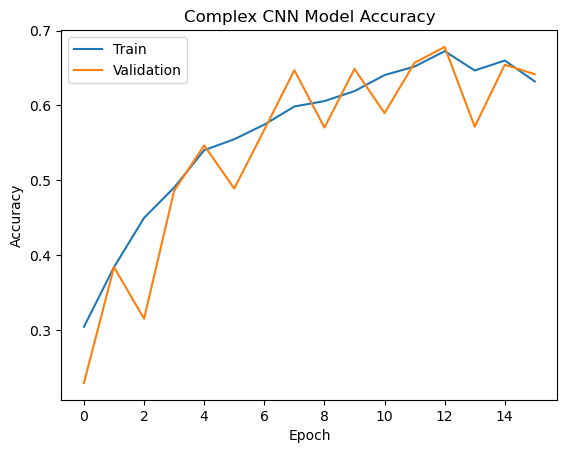

In [119]:
# Plotting the Training and Validation accuracies of EfficientNet model
plt.plot(history_complex_cnn.history['accuracy'])
plt.plot(history_complex_cnn.history['val_accuracy'])
plt.title('Complex CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Observations and Insights:**

- **A significantly more complex custom CNN model has performed better than any of the transfer learning models trialed earlier, but it still hasn't performed as well in both training and validation than our custom CNN model for Greyscale images previously chosen.**
    - Chosen CNN for Greyscale images: 71.1% training accuracy, 68% validation accuracy.
    - More complex CNN: 63.2% training accuracy, 64.1% validation accuracy.
- **This more complex CNN model has taken significantly more processing power than its simpler counterpart, as expected. The unexpected outcome is its poorer performance, however.**
- **Again, training has stopped very prematurely due to Learning Rate platoeing, which might indicate early overfitting from a model that does not generalises enough for this task. Perhaps relaxing the conditions at which the condition is met might allow the model to improve its performance over time or could lead to further overfitting.**

### A significantly more complex custom CNN hasn't performed better than our selected CNN Model for Greyscale images. An early stopping was triggered at a very early epoch 13, which might have been due to the model not generalising enough for the task. Considering the above, the CNN Model for Greyscale images is still the best performing model thus far.

### **Plotting the Confusion Matrix for the chosen final model**

Found 128 images belonging to 4 classes.
4/4 [==============================] - 0s 46ms/step
              precision    recall  f1-score   support

       happy       0.59      0.72      0.65        32
         sad       0.23      0.22      0.23        32
     neutral       0.30      0.28      0.29        32
    surprise       0.83      0.75      0.79        32

    accuracy                           0.49       128
   macro avg       0.49      0.49      0.49       128
weighted avg       0.49      0.49      0.49       128



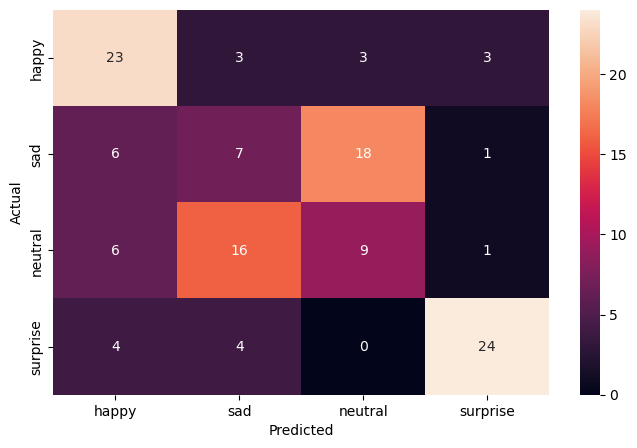

In [124]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
test_set = datagen.flow_from_directory(folder_path + "test",
                                          target_size = (img_size[0],img_size[1]),
                                          color_mode = 'grayscale',
                                          batch_size = 128,
                                          class_mode = 'categorical',
                                          classes = ['happy', 'sad', 'neutral', 'surprise'],
                                          shuffle = True)
test_images, test_labels = next(test_set)

# Evaluating with model2_gray
pred = model2_gray.predict(test_images)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred, target_names=['happy', 'sad', 'neutral', 'surprise']))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  
            fmt = '.0f', 
            xticklabels = ['happy', 'sad', 'neutral', 'surprise'], 
            yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:**
- **Happy:** This class shows a relatively high precision of 0.59 and a recall of 0.72, indicating that the model is better at correctly identifying 'happy' emotions and also capturing most of the 'happy' instances in the dataset.
- **Sad:** Both precision and recall are low for 'sad' emotions (0.23 precision, 0.22 recall), suggesting difficulties in accurately identifying and capturing all instances of sadness.
- **Neutral:** The 'neutral' class has a precision of 0.30 and a recall of 0.28, indicating a moderate ability to identify and capture neutral expressions, though with significant room for improvement.
- **Surprise:** This class has the highest precision (0.83) and a good recall rate (0.75), indicating a strong ability of the model to correctly identify 'surprise' emotions and capture most of the 'surprise' instances.

### **Trialing MobileNet V3 pre-trained model from Kaggle**

In [49]:
import tensorflow_hub as hub
import torch
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

## Trialing Data Augumentation
### The idea is to apply various transformations, such as rotation, flipping, scaling, and changes in brightness or contrast, to the existing data. This process creates additional training samples, preventing the model from overfitting and enhancing its ability to generalize well to unseen data. Data augmentation is especially valuable when dealing with limited datasets, as it effectively expands the learning capacity of models, improving their robustness and overall performance.

In [13]:
# Create an instance of ImageDataGenerator with additional image transformations (Horizontal Flip and rotation)
datagen = ImageDataGenerator(
            rescale = 1. / 255,
            horizontal_flip = True,
            vertical_flip = False,
            rotation_range = 25,
            zoom_range=0.5,
            brightness_range=(0.,2.),
            shear_range=0.3)

### MobileNet V3 uses 224x224 pixel input images, therefore a transformation for the input images should be done. 
### Fortunately, the ImageDataGenerator and flow_from_directory method in TensorFlow's Keras API can handle this resizing automatically, we just need to set the target_size parameter to (224, 224). 

In [14]:
# Set the target size to 224x224
img_size = (224, 224)
print("Images will be scaled to " + str(img_size) + " pixels")

# Creating dataloader for train for RGB dataset
train_set_pre = datagen.flow_from_directory(folder_path + "train",
                                        target_size = (img_size),
                                        color_mode = 'rgb',
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        classes = ['happy', 'sad', 'neutral', 'surprise'],
                                        shuffle = True)

# Creating dataloader for validation for RGB dataset
validation_set_pre = datagen.flow_from_directory(folder_path + "validation",
                                        target_size = (img_size),
                                        color_mode = 'rgb',
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        classes = ['happy', 'sad', 'neutral', 'surprise'],
                                        shuffle = True)

# Creating dataloader for test for RGB dataset
test_set_pre = datagen.flow_from_directory(folder_path + "test",
                                        target_size = (img_size),
                                        color_mode = 'rgb',
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        classes = ['happy', 'sad', 'neutral', 'surprise'],
                                        shuffle = True)

Images will be scaled to (224, 224) pixels
Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [15]:
# Clearing backend
backend.clear_session()

# Reset seed for number generators using reset_seed() function
reset_seed(fixed_seed)

Random number generators seed has been set to 42


### Starting a new experiment run in the specified "fine-tune mobilenetv3" project. All the training metrics, model parameters, outputs, and logs generated during this run can be tracked and visualized through the wandb dashboard. This is especially useful for comparing different runs, understanding model behavior, and iterating quickly during model development and fine-tuning.

In [67]:
# Importing Weights and Biases library and creating new project
"""
import wandb
from wandb.keras import WandbCallback
wandb.init(project="fine-tune mobilenetv3")
"""

'\nimport wandb\nfrom wandb.keras import WandbCallback\nwandb.init(project="fine-tune mobilenetv3")\n'

In [16]:
# mobilenetv3 will contain the imported model
mobilenetv3 = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v3/frameworks/TensorFlow2/variations/large-075-224-feature-vector/versions/1",
                   trainable=False),  # Can be True, see below.
    tf.keras.layers.Dense(4, activation='softmax')
])
# Batch input shape with scaled images (from 48x48 to 224x224 pixels)
mobilenetv3.build([None, img_size[0], img_size[1], 3])  

In [17]:
mobilenetv3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2731616   
                                                                 
 dense (Dense)               (None, 4)                 5124      
                                                                 
Total params: 2736740 (10.44 MB)
Trainable params: 5124 (20.02 KB)
Non-trainable params: 2731616 (10.42 MB)
_________________________________________________________________


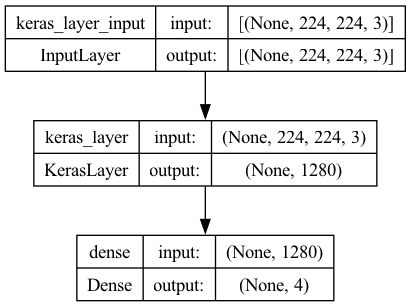

In [19]:
# Visualize the model as blocks
from tensorflow.keras.utils import plot_model
plot_model(mobilenetv3, to_file='model.png', show_shapes=True, show_layer_names=True)

In [20]:
# ModelCheckpoint is used to save the model at certain intervals
checkpoint_mobnetv3 = ModelCheckpoint("mobilenetv3.h5", # file path where the model will be saved
                    monitor='val_accuracy',  # means the callback monitors the validation accuracy
                    verbose=1,               # model is saved only when the metric (val_acc) has improved
                    save_best_only=True,
                    mode='max')

# Stop the training process early if a monitored metric has stopped improving
early_stopping = EarlyStopping(monitor = 'val_loss',  # monitors the validation loss
                          min_delta = 0,              # any positive change is considered as an improvement
                          patience = 3,               # training will be stopped if no improvement is seen for 3 epochs
                          verbose = 1,
                          restore_best_weights = True # weights are reverted to best value after early stopping
                          )

# Reduces the learning rate when a metric has stopped improving
reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss', # monitor the validation loss
                              factor = 0.2,                   # learning rate reduced to 20% when reduction is triggered
                              patience = 3,                   # reduction happens after 3 epochs with no improvement
                              verbose = 1,
                              min_delta = 0.0001)

# Configured callbacks will be passed to the model during training
callbacks_list_mobnetv3 = [early_stopping, checkpoint_mobnetv3, reduce_learningrate]

# Number of iterations over the entire dataset that the training process should run
epochs = 20

In [21]:
# Compiling the CNN model with categorical crossentropy as loss function, Adam Optimizer
# with 0.01 learning rate, and set metrics set to 'accuracy'.
mobilenetv3.compile(loss='categorical_crossentropy',
          optimizer=legacy.Adam(learning_rate = 0.01),
          metrics=['accuracy'])
total_sample=train_set_pre.n

In [86]:
# Fitting the model with required parameters above, saving model into history_resnet variable
history_mobilenetv3 = mobilenetv3.fit(
    train_set_pre,
    steps_per_epoch = train_set_pre.samples // train_set_pre.batch_size,
    validation_data = validation_set_pre,
    validation_steps = validation_set_pre.samples // validation_set_pre.batch_size,
    epochs = epochs,
    verbose = 1,
    callbacks = callbacks_list_mobnetv3
)

Epoch 1/20
472/472 [==============================] - ETA: 0s - loss: 1.4213 - accuracy: 0.4216
Epoch 1: val_accuracy improved from -inf to 0.42480, saving model to mobilenetv3.h5
472/472 [==============================] - 162s 339ms/step - loss: 1.4213 - accuracy: 0.4216 - val_loss: 1.4765 - val_accuracy: 0.4248 - lr: 0.0100
Epoch 2/20


/Users/ceb/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


472/472 [==============================] - ETA: 0s - loss: 1.3875 - accuracy: 0.4533
Epoch 2: val_accuracy improved from 0.42480 to 0.45101, saving model to mobilenetv3.h5
472/472 [==============================] - 191s 404ms/step - loss: 1.3875 - accuracy: 0.4533 - val_loss: 1.3379 - val_accuracy: 0.4510 - lr: 0.0100
Epoch 3/20
472/472 [==============================] - ETA: 0s - loss: 1.4253 - accuracy: 0.4483
Epoch 3: val_accuracy improved from 0.45101 to 0.48206, saving model to mobilenetv3.h5
472/472 [==============================] - 205s 434ms/step - loss: 1.4253 - accuracy: 0.4483 - val_loss: 1.3701 - val_accuracy: 0.4821 - lr: 0.0100
Epoch 4/20
472/472 [==============================] - ETA: 0s - loss: 1.3845 - accuracy: 0.4584
Epoch 4: val_accuracy improved from 0.48206 to 0.48831, saving model to mobilenetv3.h5
472/472 [==============================] - 193s 408ms/step - loss: 1.3845 - accuracy: 0.4584 - val_loss: 1.3222 - val_accuracy: 0.4883 - lr: 0.0100
Epoch 5/20
472/472

### Custom Classifier with MobileNetV3 Feature Extractor

In [22]:
# Clearing backend
backend.clear_session()

# Reset seed for number generators using reset_seed() function
reset_seed(fixed_seed)

Random number generators seed has been set to 42


In [23]:
# Define MobileNetV3 as a feature extractor
mobilenet_v3 = hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/feature_vector/5",
                              trainable=False)

mnetv3_2 = tf.keras.Sequential([
    # Feature extractor
    mobilenet_v3,
    
    # Adding Dense layer with 128 nodes and "relu" activation
    tf.keras.layers.Dense(128, activation="relu"),
    # Adding dropout layer 
    tf.keras.layers.Dropout(0.5),
    # BatchNormalisation layer
    tf.keras.layers.BatchNormalization(),
    # Flattening all layers
    tf.keras.layers.Flatten(),
    # Output layer with 4 classes and "softmax" activation
    tf.keras.layers.Dense(4, activation="softmax")  
])

# Batch input shape with scaled images (from 48x48 to 224x224 pixels)
mnetv3_2.build([None, img_size[0], img_size[1], 3])  

In [24]:
# Define MobileNetV3 as a feature extractor
mobilenet_v3 = hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/feature_vector/5",
                              trainable=False,input_shape=(224,224,3))

### SEBlock: Squeeze-and-Excitation Block for Improved Feature Representation
#### The "SEBlock" is a Squeeze-and-Excitation block designed to enhance feature representation in neural networks. By dynamically recalibrating channel-wise feature responses, it improves the model's ability to capture important patterns and boost overall performance. The block consists of a Global Average Pooling layer followed by two fully connected layers, contributing to a more adaptive and effective feature learning process.

In [40]:
class SEBlock(tf.keras.layers.Layer):
    def __init__(self, ratio=16):
        super(SEBlock, self).__init__()
        self.ratio = ratio
        # Removing the GlobalAveragePooling2D layer since it's not needed for 2D inputs

    def build(self, input_shape):
        num_channels = input_shape[-1]
        self.fc1 = tf.keras.layers.Dense(num_channels // self.ratio, activation='relu')
        self.fc2 = tf.keras.layers.Dense(num_channels, activation='sigmoid')

    def call(self, inputs):
        # Using `inputs` instead of `x`
        x = self.fc1(inputs)
        x = self.fc2(x)
        return x * inputs


In [41]:
# Create and build the model
target_size = (224, 224)
model = tf.keras.Sequential([
    mobilenet_v3,
    SEBlock(ratio=16),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation="softmax")
])

model.build((32, *target_size, 3))  # Define the input shape

In [27]:
# Compiling the CNN model with categorical crossentropy as loss function, Adam Optimizer
# with 0.01 learning rate, and set metrics set to 'accuracy'.
model.compile(loss='categorical_crossentropy',
          optimizer=legacy.Adam(learning_rate = 0.01),
          metrics=['accuracy'])
total_sample=train_set_pre.n

In [28]:
#Model summary
mnetv3_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2731616   
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                        

In [29]:
# ModelCheckpoint is used to save the model at certain intervals
checkpoint_mobnetv3_1 = ModelCheckpoint("mobilenetv3_1.h5", # file path where the model will be saved
                    monitor='val_accuracy',  # means the callback monitors the validation accuracy
                    verbose=1,               # model is saved only when the metric (val_acc) has improved
                    save_best_only=True,
                    mode='max')

# Configured callbacks will be passed to the model during training
callbacks_list_mobnetv3 = [early_stopping, checkpoint_mobnetv3_1, reduce_learningrate]

# Number of iterations over the entire dataset that the training process should run
epochs = 20

In [133]:
# Fitting the model with required parameters above, saving model into history_resnet variable
history_mobilenetv3_1 = model.fit(
    train_set_pre,
    steps_per_epoch = train_set_pre.samples // train_set_pre.batch_size,
    validation_data = validation_set_pre,
    validation_steps = validation_set_pre.samples // validation_set_pre.batch_size,
    epochs = epochs,
    verbose = 1,
    callbacks = callbacks_list_mobnetv3
)

Epoch 1/20
472/472 [==============================] - ETA: 0s - loss: 1.3299 - accuracy: 0.3697
Epoch 1: val_accuracy improved from -inf to 0.43871, saving model to mobilenetv3_1.h5
472/472 [==============================] - 167s 352ms/step - loss: 1.3299 - accuracy: 0.3697 - val_loss: 1.2176 - val_accuracy: 0.4387 - lr: 0.0100
Epoch 2/20
472/472 [==============================] - ETA: 0s - loss: 1.2501 - accuracy: 0.4137
Epoch 2: val_accuracy improved from 0.43871 to 0.44375, saving model to mobilenetv3_1.h5
472/472 [==============================] - 160s 339ms/step - loss: 1.2501 - accuracy: 0.4137 - val_loss: 1.2040 - val_accuracy: 0.4437 - lr: 0.0100
Epoch 3/20
472/472 [==============================] - ETA: 0s - loss: 1.2461 - accuracy: 0.4222
Epoch 3: val_accuracy did not improve from 0.44375
472/472 [==============================] - 164s 347ms/step - loss: 1.2461 - accuracy: 0.4222 - val_loss: 1.2318 - val_accuracy: 0.4187 - lr: 0.0100
Epoch 4/20
472/472 [======================

## Removing early stopping on learning rate plateau

In [30]:
# ModelCheckpoint is used to save the model at certain intervals
checkpoint_mobnetv3_2 = ModelCheckpoint("mobilenetv3_2.h5", # file path where the model will be saved
                    monitor='val_accuracy',  # means the callback monitors the validation accuracy
                    verbose=1,               # model is saved only when the metric (val_acc) has improved
                    save_best_only=True,
                    mode='max')

# Configured callbacks will be passed to the model during training
callbacks_list_mobnetv3_2 = [early_stopping, checkpoint_mobnetv3_2]#, reduce_learningrate]

# Number of iterations over the entire dataset that the training process should run
epochs = 20

In [136]:
# Fitting the model with required parameters above, saving model into history_resnet variable
history_mobilenetv3_2 = model.fit(
    train_set_pre,
    steps_per_epoch = train_set_pre.samples // train_set_pre.batch_size,
    validation_data = validation_set_pre,
    validation_steps = validation_set_pre.samples // validation_set_pre.batch_size,
    epochs = epochs,
    verbose = 1,
    callbacks = callbacks_list_mobnetv3_2
)

Epoch 1/20
472/472 [==============================] - ETA: 0s - loss: 1.1997 - accuracy: 0.4504
Epoch 1: val_accuracy improved from -inf to 0.47500, saving model to mobilenetv3_2.h5
472/472 [==============================] - 167s 354ms/step - loss: 1.1997 - accuracy: 0.4504 - val_loss: 1.1579 - val_accuracy: 0.4750
Epoch 2/20
472/472 [==============================] - ETA: 0s - loss: 1.1946 - accuracy: 0.4586
Epoch 2: val_accuracy improved from 0.47500 to 0.47964, saving model to mobilenetv3_2.h5
472/472 [==============================] - 178s 378ms/step - loss: 1.1946 - accuracy: 0.4586 - val_loss: 1.1509 - val_accuracy: 0.4796
Epoch 3/20
472/472 [==============================] - ETA: 0s - loss: 1.1850 - accuracy: 0.4665
Epoch 3: val_accuracy did not improve from 0.47964
472/472 [==============================] - 207s 439ms/step - loss: 1.1850 - accuracy: 0.4665 - val_loss: 1.1576 - val_accuracy: 0.4778
Epoch 4/20
472/472 [==============================] - ETA: 0s - loss: 1.1855 - ac

### **Evaluating the MobileNetV3 Model from Kaggle**

In [43]:
import tensorflow as tf
import tensorflow_hub as hub

# Ensure that the SEBlock class is defined exactly as it was when the model was saved
class SEBlock(tf.keras.layers.Layer):
    def __init__(self, ratio=16):
        super(SEBlock, self).__init__()
        self.ratio = ratio
        # Removing the GlobalAveragePooling2D layer since it's not needed for 2D inputs

    def build(self, input_shape):
        num_channels = input_shape[-1]
        self.fc1 = tf.keras.layers.Dense(num_channels // self.ratio, activation='relu')
        self.fc2 = tf.keras.layers.Dense(num_channels, activation='sigmoid')

    def call(self, inputs):
        # Using `inputs` instead of `x`
        x = self.fc1(inputs)
        x = self.fc2(x)
        return x * inputs

# Load the model with custom object scope
with tf.keras.utils.custom_object_scope({'KerasLayer': hub.KerasLayer, 'SEBlock': SEBlock}):
    mobilenetv3_2 = tf.keras.models.load_model("mobilenetv3_2.h5")


In [44]:
# Evaluate the model on the test data
test_loss, test_accuracy = mobilenetv3_2.evaluate(test_set_pre, verbose=1)

# Print the results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 [==============================] - 2s 219ms/step - loss: 1.0917 - accuracy: 0.5078
Test Loss: 1.0916602611541748
Test Accuracy: 0.5078125


### Trying out best CNN model with data augmentation (Image Rotation and Brightness changes)

## Trialing Data Augumentation
### The idea is to apply various transformations, such as rotation, flipping, scaling, and changes in brightness or contrast, to the existing data. This process creates additional training samples, preventing the model from overfitting and enhancing its ability to generalize well to unseen data. Data augmentation is especially valuable when dealing with limited datasets, as it effectively expands the learning capacity of models, improving their robustness and overall performance.

In [59]:
# Create an instance of ImageDataGenerator with additional image transformations (Horizontal Flip and rotation)
datagen = ImageDataGenerator(
            rescale = 1. / 255,
            horizontal_flip = True,
            vertical_flip = False,
            width_shift_range=0.2,
            height_shift_range=0.2,
            rotation_range = 25,
            zoom_range=0.5,
            brightness_range=(0.,2.),
            shear_range=0.3,
            fill_mode='nearest')    

In [60]:
# Set the target size to 48x48 again
img_size = (48, 48)

# Creating dataloader for train for Grayscale dataset
train_set_gray = datagen.flow_from_directory(folder_path + "train",
                                        target_size = (img_size),
                                        color_mode = 'grayscale',
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        shuffle = True)

# Creating dataloader for validation for Grayscale dataset
validation_set_gray = datagen.flow_from_directory(folder_path + "validation",
                                        target_size = (img_size),
                                        color_mode = 'grayscale',
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        shuffle = True)

# Creating dataloader for test for Grayscale dataset
test_set_gray = datagen.flow_from_directory(folder_path + "test",
                                        target_size = (img_size),
                                        color_mode = 'grayscale',
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [61]:
# Clearing backend
backend.clear_session()

# Reset seed for number generators using reset_seed() function
reset_seed(fixed_seed)

Random number generators seed has been set to 42


In [56]:
# Load the saved model if notebook session gets disconnected
model2_gray_da = load_model("model2_grayscale.h5")

In [62]:
# ModelCheckpoint is used to save the model at certain intervals
checkpoint_best_da = ModelCheckpoint("best_da.h5", # file path where the model will be saved
                    monitor='val_accuracy',  # means the callback monitors the validation accuracy
                    verbose=1,               # model is saved only when the metric (val_acc) has improved
                    save_best_only=True,
                    mode='max')

# Stop the training process early if a monitored metric has stopped improving
early_stopping = EarlyStopping(monitor = 'val_loss',  # monitors the validation loss
                          min_delta = 0,              # any positive change is considered as an improvement
                          patience = 3,               # training will be stopped if no improvement is seen for 3 epochs
                          verbose = 1,
                          restore_best_weights = True # weights are reverted to best value after early stopping
                          )

# Configured callbacks will be passed to the model during training
callbacks_list_mobnetv3 = [early_stopping, checkpoint_best_da]#, reduce_learningrate]

# Number of iterations over the entire dataset that the training process should run
epochs = 20

In [63]:
# Train the model
history = model2_gray_da.fit(
    train_set_gray,
    steps_per_epoch=train_set_gray.samples // train_set_gray.batch_size,
    validation_data=validation_set_gray,
    validation_steps=validation_set_gray.samples // validation_set_gray.batch_size,
    epochs=epochs
)

Epoch 1/20
472/472 [==============================] - 100s 210ms/step - loss: 1.1809 - accuracy: 0.4630 - val_loss: 1.1547 - val_accuracy: 0.4879
Epoch 2/20
472/472 [==============================] - 108s 229ms/step - loss: 1.1257 - accuracy: 0.5037 - val_loss: 1.2045 - val_accuracy: 0.4333
Epoch 3/20
472/472 [==============================] - 132s 280ms/step - loss: 1.1144 - accuracy: 0.5008 - val_loss: 1.1813 - val_accuracy: 0.4460
Epoch 4/20
472/472 [==============================] - 102s 216ms/step - loss: 1.0910 - accuracy: 0.5213 - val_loss: 1.0842 - val_accuracy: 0.5032
Epoch 5/20
472/472 [==============================] - 142s 302ms/step - loss: 1.0754 - accuracy: 0.5246 - val_loss: 1.1057 - val_accuracy: 0.4990
Epoch 6/20
472/472 [==============================] - 139s 295ms/step - loss: 1.0696 - accuracy: 0.5228 - val_loss: 1.1310 - val_accuracy: 0.4821
Epoch 7/20
472/472 [==============================] - 113s 240ms/step - loss: 1.0529 - accuracy: 0.5360 - val_loss: 1.0399 -

In [64]:
# Evaluate the model on the test data using Grayscale model
test_loss, test_accuracy = model2_gray_da.evaluate(test_set_gray, verbose=1)

# Print the results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 [==============================] - 0s 80ms/step - loss: 1.0238 - accuracy: 0.5703
Test Loss: 1.0238081216812134
Test Accuracy: 0.5703125


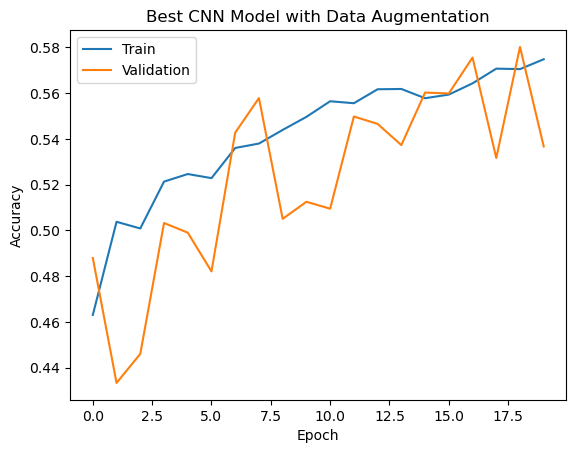

In [65]:
# Plotting the Training and Validation accuracies of CNN model 2 and Grayscale images
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Best CNN Model with Data Augmentation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Observations and Insights:**

- **Surprisingly, in trying to improve the model by doing data augmentation has actually caused a deterioration in performance.**
    - Chosen CNN with data augmentation: 57.5% training accuracy, 53.7% validation accuracy.

### Considering the above, the CNN Model for Greyscale images without data augmentation is the best performing model trialed, therefore the selected model.

## **Conclusion:**
### EDA Observations:
- **The provided images were all of the same size 48x48 pixels. From the images sampled, all images seem to be useful.**
- **Images provided in the dataset are Greyscale (monochromatic), which should be taken into consideration by the ML Engineer.**
- **There is an under-representation of the "surprise" class in the training and validation datasets, which in a first instance have raised a suspicion that this class would under-perform.**
- **Expressions of distinct classes are very similar, for instance between sad and neutral expressions. These images, if unlabeled, would be tricky to be classified even for a human eye.**
- **Several of the images have watermarks, which would potentially affect the outcome of the models' training and predictions.**

### CNNs and Transfer Learning model trialing:
- **All of the Transfer Leaning models trialed have stopped early due to a plateau in the Learning Rate, which likely indicates that these models do not generalise enough for this particular task.**
    - **VGG16:** 50.2% training accuracy, 47.4% validation accuracy.
    - **ResnetV2:** 38.2% training accuracy, 30.75% validation accuracy.
    - **EfficientNet:** 26.1% training accuracy, 26% validation accuracy.
    
### MobileNet V3 model from Kaggle has also been trialed, with data augmentation and removing the early stopping on Learning Rate plateau, but still hasn't performed as well as the custom CNN for Greyscale images:

   - **MobileNet V3:** 46.8% training accuracy, 48.8% validation accuracy.
    
### The best CNN trialed has provided a 71.1% training accuracy, 68% validation accuracy. Surprisingly, Data augmentation was also performed to input data to best performing CNN trialed in this notebook, but it has caused a deterioration in the model's performance (Training and Validation accuracies dropped to 57% and 53% respectively).
    
- **In general, utilising RGB images as the input to CNNs do not improve the performance. This is perhaps expected, since the images provided in the dataset are all in greyscale.**
- **The custom CNN model for grayscale images significantly outperforms the transfer learning models (VGG16, ResnetV2, and EfficientNet) in both training and validation accuracies.**
- **Increasing the complexity of the custom CNN did not result in a better performance**
    - **More complex CNN:** 63.2% training accuracy, 64.1% validation accuracy.

### The selected model was a "medium" complexity custom CNN model, that seems to generalise enough for the task in hands with 71.1% training accuracy and 68% validation accuracy and a very reasonable processing time.
### More complex pre-trained models did not perform as well as our custom "medium" comnplexity CNN model.

### Although the "surprise" class was the most imbalanced class dataset, with 20% less training and validation data, the real surprise was with the results of the confusion matrix with the test data where it has outperformed all other classes. 
    - "surprise" had the highest precision (0.83) and a good recall rate (0.75).
    - "happy" had the second best performance with a precision of 0.59 and a recall of 0.72.
    - "neutral" class stands in third, with a precision of 0.30 and a recall of 0.28
    - "sad" has performed the worst, with 0.23 precision, 0.22 recall
### This is perhaps due to "surprise" expressions being very clear with features such as an open mouth, present in most images. It is also very tricky for the human eye to distinguish between some of the "neutral" and "sad" expressions, possibly the reason for the poor performance of these two classes.

## Future Improvement Suggestions:
- **Learning how to generalise more the Transfer Learning models, which in theory should perform better than the other models**
- **Providing more training data could potentially improve the accuracy of the models, especially for the "happy" and "surprised" datasets, which can cause confusion in the training.**
- **Reducing the imbalance between the different classes will most likely improve the results.**
- **Providing actual RGB images might also improve the classification precision, since colour data might reveal subtle differences in emotions, such as shadowing and eye colour when subjects are smalling and with eyes wide open.**